# Práctica final Machine Learning

Práctica realizada por Ana Páramo Ruiz de Azúa, Clara Vicente Ruíz y Eduardo Corchero Sánchez.

En este notebook vamos a realizar un proyecto de aprendizaje automático, en el que trataremos de construir modelos para predecir el precio de los alojamientos de **AIRBNB**. Para ello, usaremos el dataset disponible en el campus virtual.

## 1. CARGA DE DATOS.

In [ ]:
#Primero importamos las librerias que vamos a necesitar a lo largo del proyecto:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss

#Cargamos el dataset
df = pd.read_csv('airbnb-listings-extract (2).csv',sep=';',encoding='latin-1')

Veamos primero la pinta que tiene nuestra base de datos.

In [ ]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

Nuestra base de datos cuenta tiene 89 variables y 14780 observaciones. 


##2. ANÁLISIS EXPLORATORIO.

### PRIMERA CRIBA DE VARIABLES

Como vimos antes, de las 89 variables, 53 no son numéricas, por lo que tendremos que estudiar qué hacer con ellas. También tendremos que eliminar las variables compuestas por strings que no sean posibles de incluir en nuestros modelos. 

Las variables "Host Acceptance Rate" y "Has Availability" tienen solo 39 y 12 valores no nulos, y la variable "Square Feet" solo tiene 598 valores no nulos, por lo que creemos que estas variables aportarán poca información y pueden ser eliminadas.
 
Por otro lado, "ID", "Listing Url", "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host ID", "Host URL", "Host Thumbnail Url", "Host Picture Url" son identificadores únicos de cada variable o enlaces que no aportan nada de interés para el análisis. Procedemos a borrarlas.

Eliminamos también variables irrelevantes, a simple vista, para la construcción de un evaluador de precios, como "Name" o "Jurisdiction Names". También eliminamos aquellas variables que tienen descripciones en forma de string. Las variables que contienen información de fechas como "First Review" y "Calendar last Scraped" las eliminamos también.


In [ ]:
df=df.drop(df.columns[[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,
                             19,20,21,23,24,27,28,29,30,34,35,36,37,40,43,
                             45,46,55,66,71,73,82,83,87,88]] , axis=1)

Una vez hecha una primera criba de variables, veamos qué pinta tiene ahora nuestra base de datos. 

In [ ]:
df.head()

,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,City,State,Market,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
0,none,2016-02-11,within an hour,100.0,1.0,1.0,"email,phone,reviews,kba",Austin,TX,Austin,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50
1,none,2016-11-08,within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Barcelona,Barcelona,...,80.0,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86
2,none,2016-11-08,within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Barcelona,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN
3,none,2010-05-25,within an hour,100.0,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",Barcelona,Barcelona,Barcelona,...,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09
4,none,2016-01-12,within an hour,99.0,207.0,207.0,"email,phone,reviews,jumio",Barcelona,Catalunya,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             14780 non-null  object 
 1   Host Since                      14777 non-null  object 
 2   Host Response Time              12881 non-null  object 
 3   Host Response Rate              12881 non-null  float64
 4   Host Listings Count             14777 non-null  float64
 5   Host Total Listings Count       14777 non-null  float64
 6   Host Verifications              14774 non-null  object 
 7   City                            14774 non-null  object 
 8   State                           14636 non-null  object 
 9   Market                          14723 non-null  object 
 10  Smart Location                  14780 non-null  object 
 11  Country                         14779 non-null  object 
 12  Property Type                   

Nuestro dataset ha pasado a tener 46 variables. 16 no son numéricas, por lo que más adelante comprobaremos si se pueden categorizar, o si, por el contrario, hemos de eliminarlas también.



Veamos ahora los **MISSINGS** de cada variable. Posteriormente estudiaremos si son necesarios de imputar.

In [ ]:
df.isna().sum()

Experiences Offered                   0
Host Since                            3
Host Response Time                 1899
Host Response Rate                 1899
Host Listings Count                   3
Host Total Listings Count             3
Host Verifications                    6
City                                  6
State                               144
Market                               57
Smart Location                        0
Country                               1
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            55
Bedrooms                             25
Beds                                 49
Bed Type                              0
Amenities                           170
Price                                17
Weekly Price                      11190
Monthly Price                     11219
Security Deposit                   8524
Cleaning Fee                       6093


Veamos si hay alguna observación duplicada.

In [ ]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
num_duplicados

24

Eliminamos las observaciones duplicadas, ya que muy probablemente se deban a anuncios de alojamientos repetidos para tener más visibilidad en la plataforma.

In [ ]:
df = df.drop_duplicates()

Veamos la cantidad de valores únicos por variable. Esto nos va a ayudar a conocer qué variables cualitativas se pueden catagorizar. 

In [ ]:
df.nunique()

Experiences Offered                   5
Host Since                         2116
Host Response Time                    4
Host Response Rate                   70
Host Listings Count                  56
Host Total Listings Count            56
Host Verifications                  206
City                                246
State                               102
Market                               43
Smart Location                      257
Country                              17
Property Type                        22
Room Type                             3
Accommodates                         16
Bathrooms                            17
Bedrooms                             10
Beds                                 16
Bed Type                              5
Amenities                         12379
Price                               370
Weekly Price                        388
Monthly Price                       586
Security Deposit                    124
Cleaning Fee                        111


Una vez que tenemos más información acerca de las variables que se han salvado de la eliminación inicial, procedemos a analizarlas más en detalle. Primero estudiamos las variables cuantitativas, y, a continuación, las cualitativas.

### ANÁLISIS DE LAS VARIABLES CUANTITATIVAS

Veamos algunos estadísticos descriptivos de las variables cuantitativas para conocer cómo se distribuyen.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,12870.0,94.828050,15.211873,0.00,100.00,100.0,100.00,100.00
Host Listings Count,14753.0,12.493933,34.101400,0.00,1.00,2.0,6.00,519.00
Host Total Listings Count,14753.0,12.493933,34.101400,0.00,1.00,2.0,6.00,519.00
Accommodates,14756.0,3.279547,2.097971,1.00,2.00,3.0,4.00,16.00
Bathrooms,14701.0,1.281171,0.656860,0.00,1.00,1.0,1.00,8.00
Bedrooms,14731.0,1.344444,0.900415,0.00,1.00,1.0,2.00,10.00
Beds,14707.0,2.044877,1.613480,1.00,1.00,2.0,2.00,16.00
Price,14739.0,73.425741,71.775108,9.00,34.00,55.0,86.00,999.00
Weekly Price,3588.0,376.954849,195.753418,70.00,215.00,350.0,500.00,999.00
Monthly Price,3559.0,1426.147794,1246.751586,250.00,720.00,1200.0,1725.00,25000.00


Las representamos ahora en histogramas y en Box-Plots

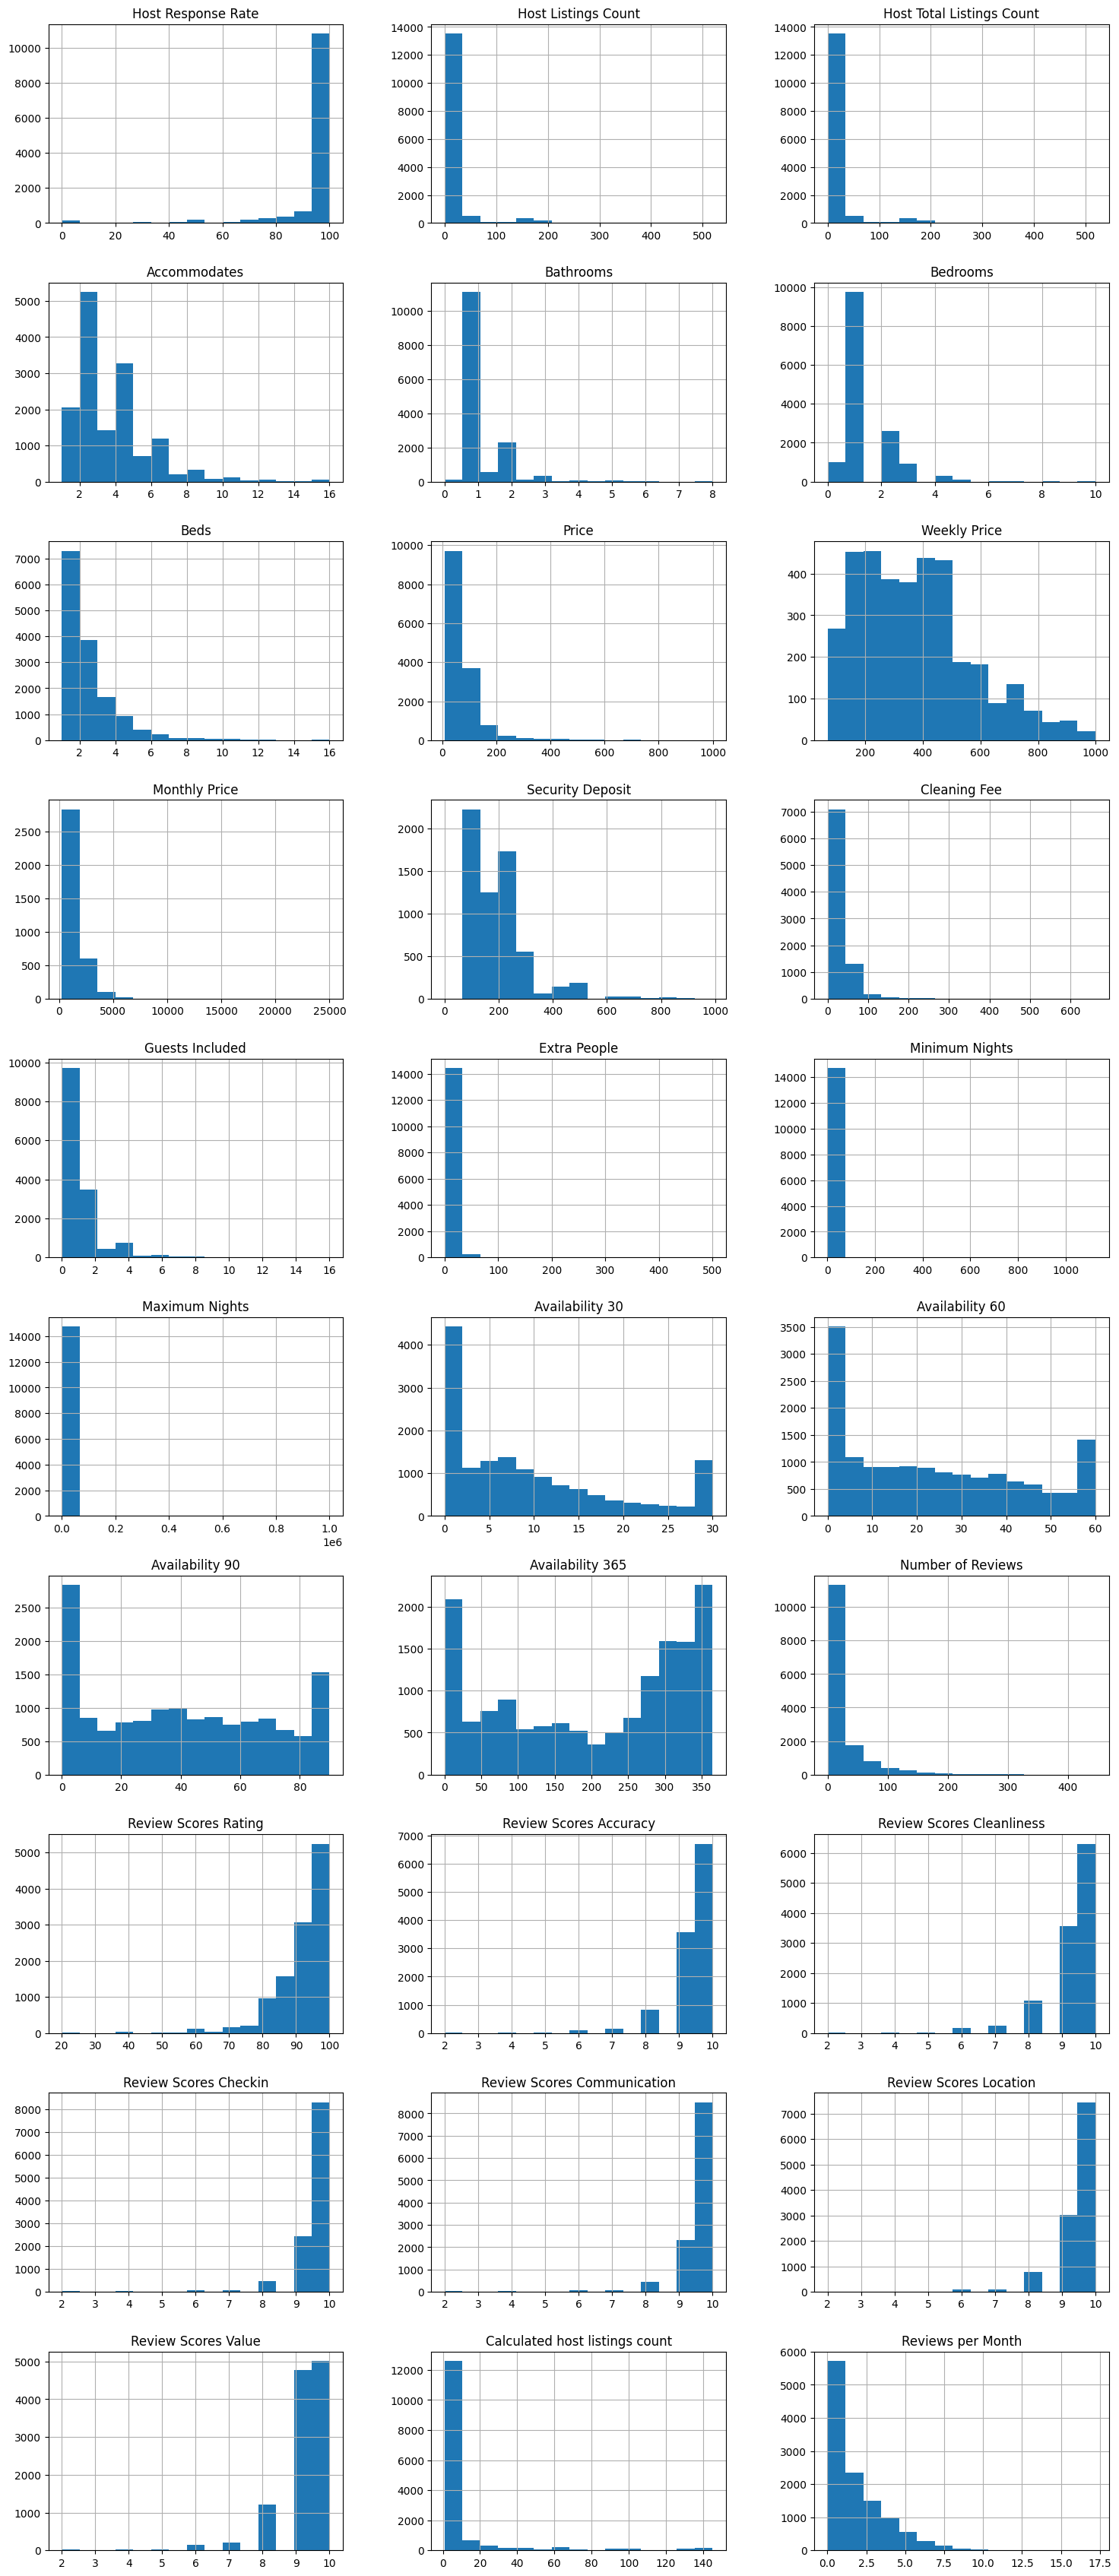

In [ ]:
df.hist(figsize=(18,52), layout=(12,3), bins=15) 
plt.show()

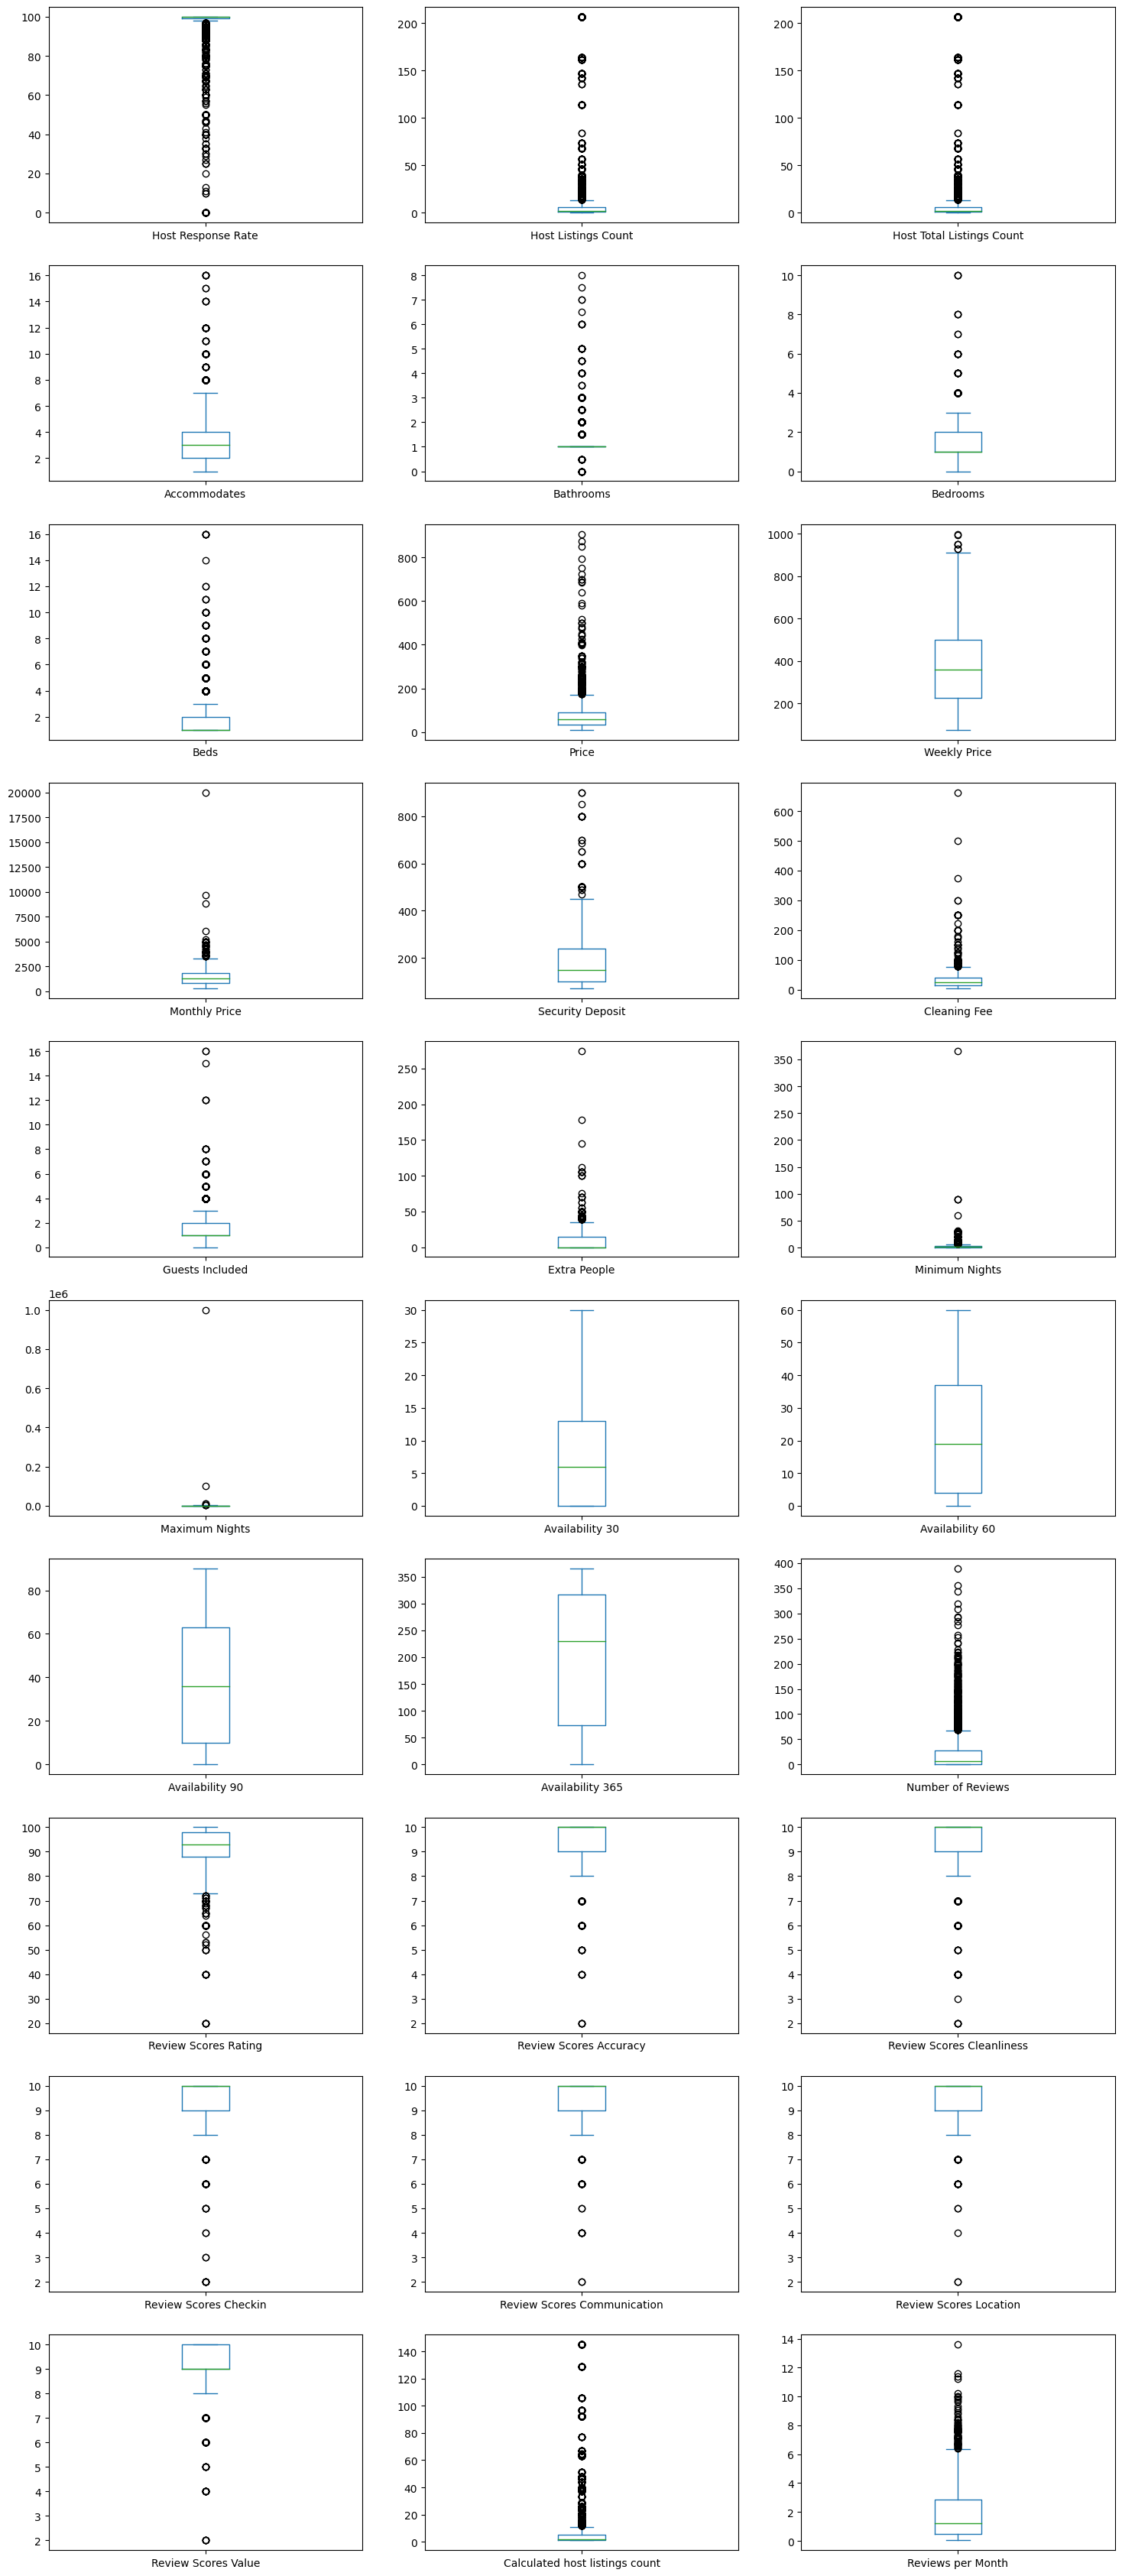

In [ ]:
df.plot(figsize=(18,52), kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False)
plt.show()

Vamos a analizar en más detalle los outliers de aquellas variables que creemos que pueden alterar la posterior construcción de los modelos.



Extra People:

<Axes: xlabel='Extra People'>

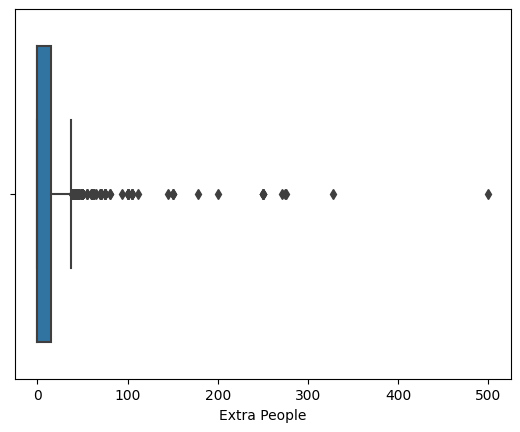

In [ ]:
sns.boxplot(x=df['Extra People'])

Eliminamos los outliers con valor mayor de 80, por poder ser puntos muy influyentes a la hora de construir los modelos, y que consideramos no cercanos a la realidad, ya que no imaginamos una casa en la que se puede meter más de 80 personas extra, a parte de las que entran por defecto. 

In [ ]:
df = df[(df['Extra People']<80)]

<Axes: xlabel='Extra People'>

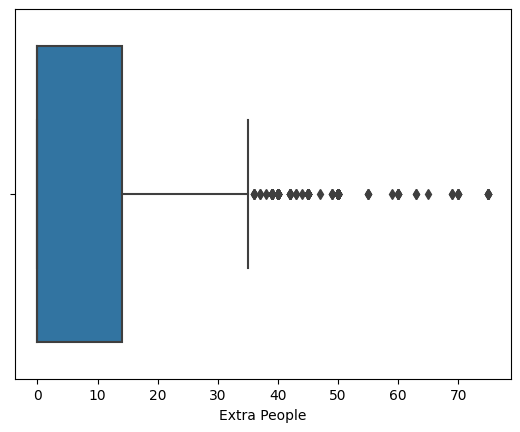

In [ ]:
sns.boxplot(x=df['Extra People'])

Sigue habiendo outliers en la variable, pero no con tanto peso como los que hemos retirado.

Minimum Nights:

<Axes: xlabel='Minimum Nights'>

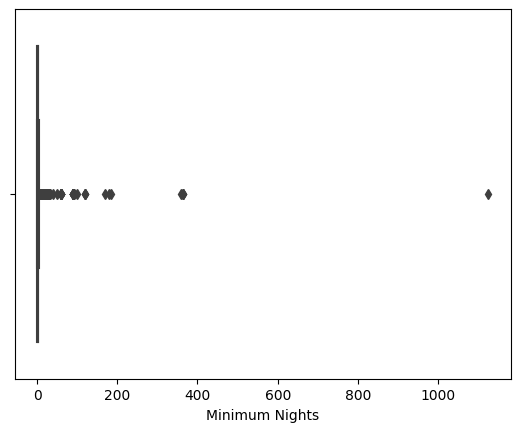

In [ ]:
sns.boxplot(x=df['Minimum Nights'])

Observamos un outlier muy lejano a los demás. Veamos cuál es.

In [ ]:
df['Minimum Nights'].max()

1125

Lo eliminamos al poder tener demasiado peso en la variable y no tener mucho sentido ese valor.

In [ ]:
df = df[(df['Minimum Nights']<1124)]

<Axes: xlabel='Minimum Nights'>

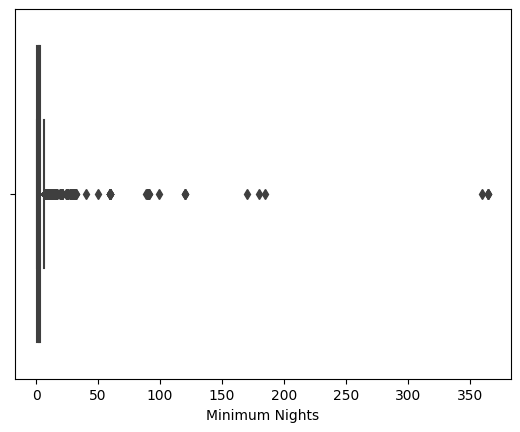

In [ ]:
sns.boxplot(x=df['Minimum Nights'])

Sigue habiendo dos outliers que pueden tener mucho peso en la variable. Los eliminamos también.

In [ ]:
df = df[(df['Minimum Nights']<350)]

<Axes: xlabel='Minimum Nights'>

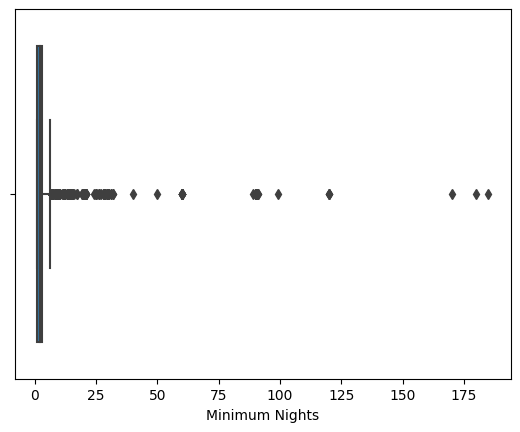

In [ ]:
sns.boxplot(x=df['Minimum Nights'])

In [ ]:
df = df[(df['Minimum Nights']<75)]

<Axes: xlabel='Minimum Nights'>

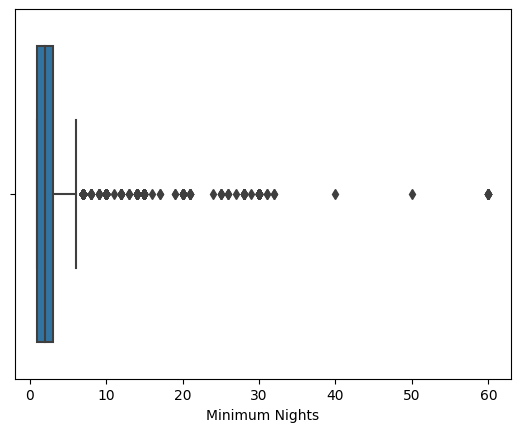

In [ ]:
sns.boxplot(x=df['Minimum Nights'])

Todavía hay muchos valores atípicos en la variable. Sin embargo, no eliminamos más, ya que esto se debe a que la mayoría de los alojamientos tienen una estancia mínima de 3 días.

Maximum Nights:

<Axes: xlabel='Maximum Nights'>

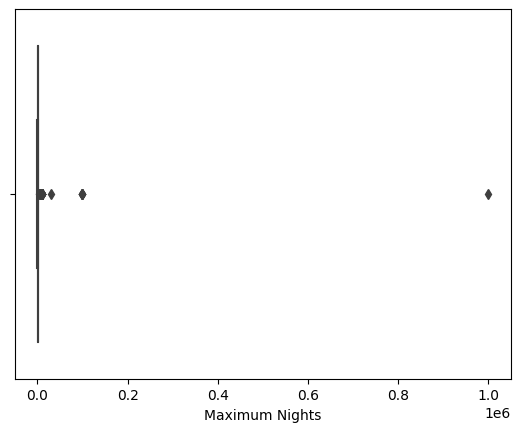

In [ ]:
sns.boxplot(x=df['Maximum Nights'])

In [ ]:
df['Maximum Nights'].max()

1000000

Eliminamos el outlier, al ser un punto potencialmente muy influyente en la construir los modelos.

In [ ]:
df = df[(df['Maximum Nights']<9999)]

<Axes: xlabel='Maximum Nights'>

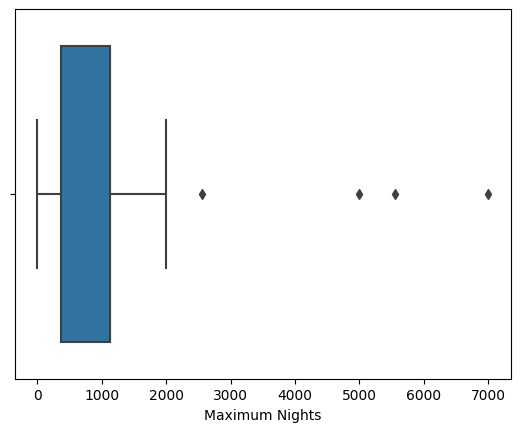

In [ ]:
sns.boxplot(x=df['Maximum Nights'])

In [ ]:
df = df[(df['Maximum Nights']<2100)]

<Axes: xlabel='Maximum Nights'>

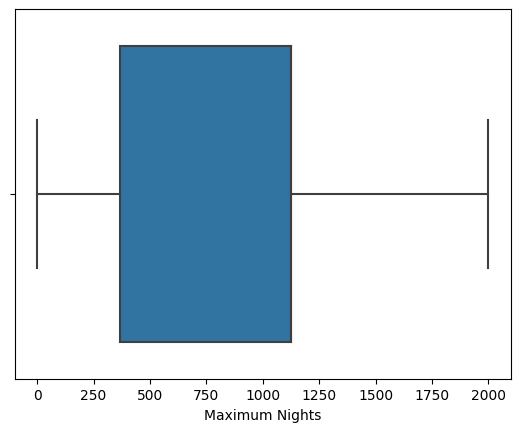

In [ ]:
sns.boxplot(x=df['Maximum Nights'])

### ANÁLISIS DE LAS VARIABLES CUALITATIVAS

En primer lugar, analizamos las variables State, Market, City, Smart Location y Country

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


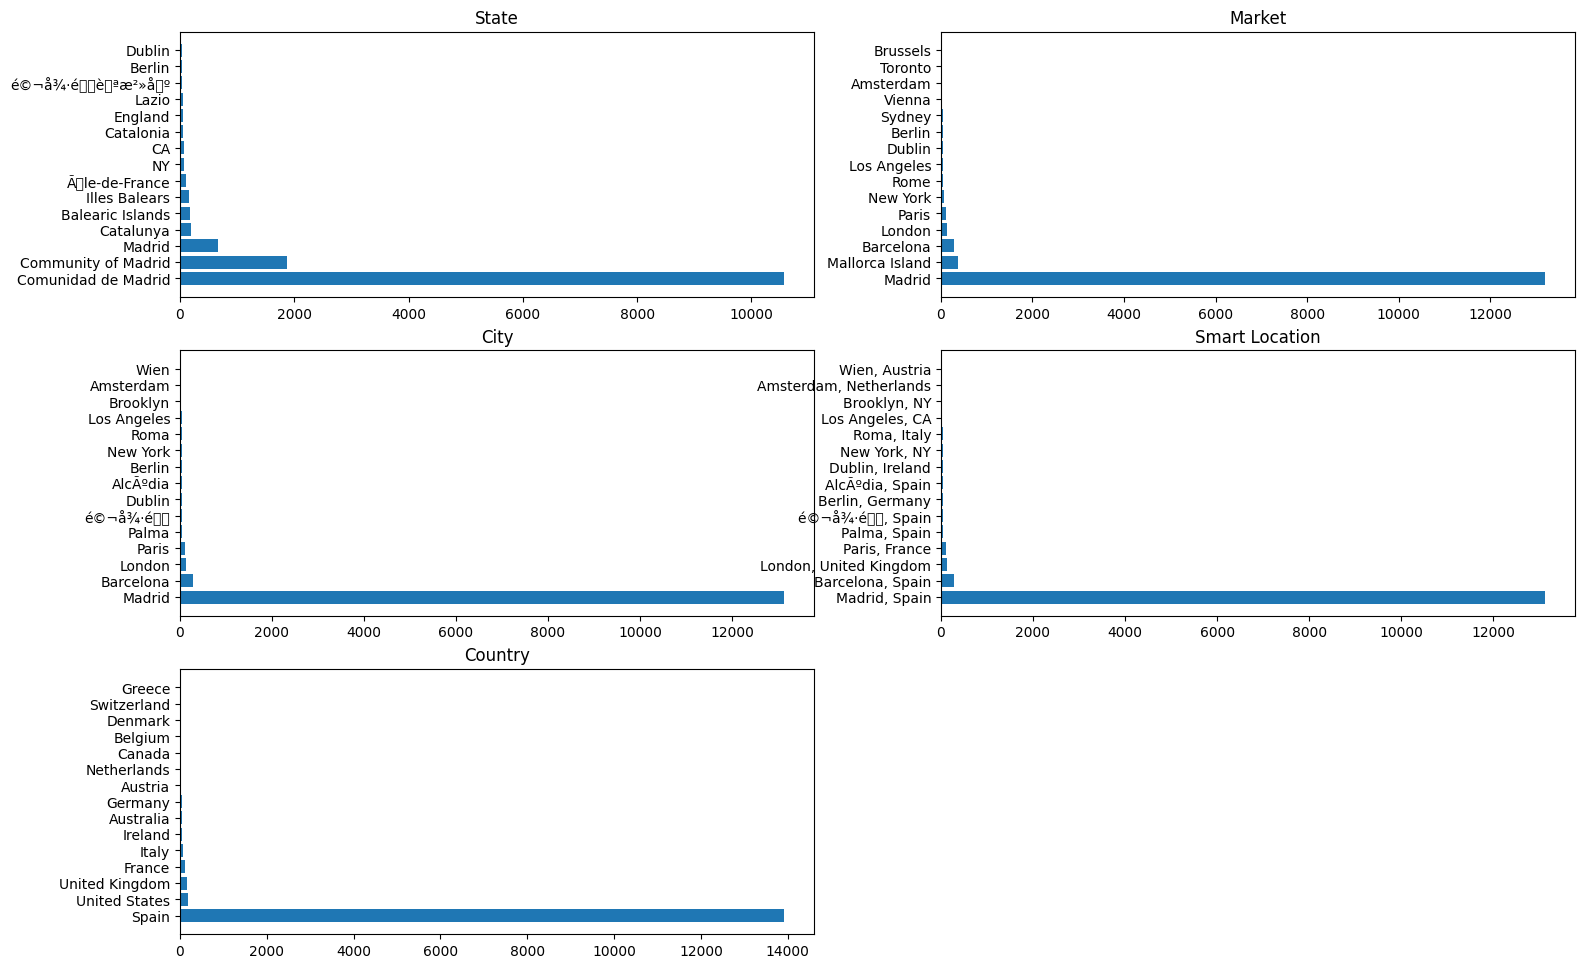

In [ ]:
plt.figure(figsize=(18, 20))

plt.subplot(5, 2, 1)
plt.barh(df['State'].value_counts()[:15].index, df['State'].value_counts()[:15])
plt.gca().set_title('State')

plt.subplot(5, 2, 2)
plt.barh(df['Market'].value_counts()[:15].index, df['Market'].value_counts()[:15])
plt.gca().set_title('Market')

plt.subplot(5, 2, 3)
plt.barh(df['City'].value_counts()[:15].index, df['City'].value_counts()[:15])
plt.gca().set_title('City')

plt.subplot(5, 2, 4)
plt.barh(df['Smart Location'].value_counts()[:15].index, df['Smart Location'].value_counts()[:15])
plt.gca().set_title('Smart Location')

plt.subplot(5, 2, 5)
plt.barh(df['Country'].value_counts()[:15].index, df['Country'].value_counts()[:15])
plt.gca().set_title('Country')

plt.show()

Las variables State, Market, City y Smart Location presentan problemas de estructura. Podemos encontrar dos veces la misma localización en las variables pero escrita de forma distinta. Además, observamos un gran desbalanceo en las cuatro variables, al estar la mayoría de los alojamientos situados en Madrid. Debido a esto, decidimos eliminar las cuatro variables, ya que nos darían muchos problemas en la construcción de modelos predictivos.

También se observa un gran desbalanceo en la variable country, pero la vamos a conservar para tener una variable que haga referencia a la localización, aunque probablemente no la utilicemos en la construcción de los modelos al estar muy desbalanceada.

In [ ]:
df=df.drop(['State','Market','City','Smart Location'],axis=1)

Ahora representamos las variables categóricas en gráficos de barras, para ver cómo se distribuyen los datos en sus distintas categorías.

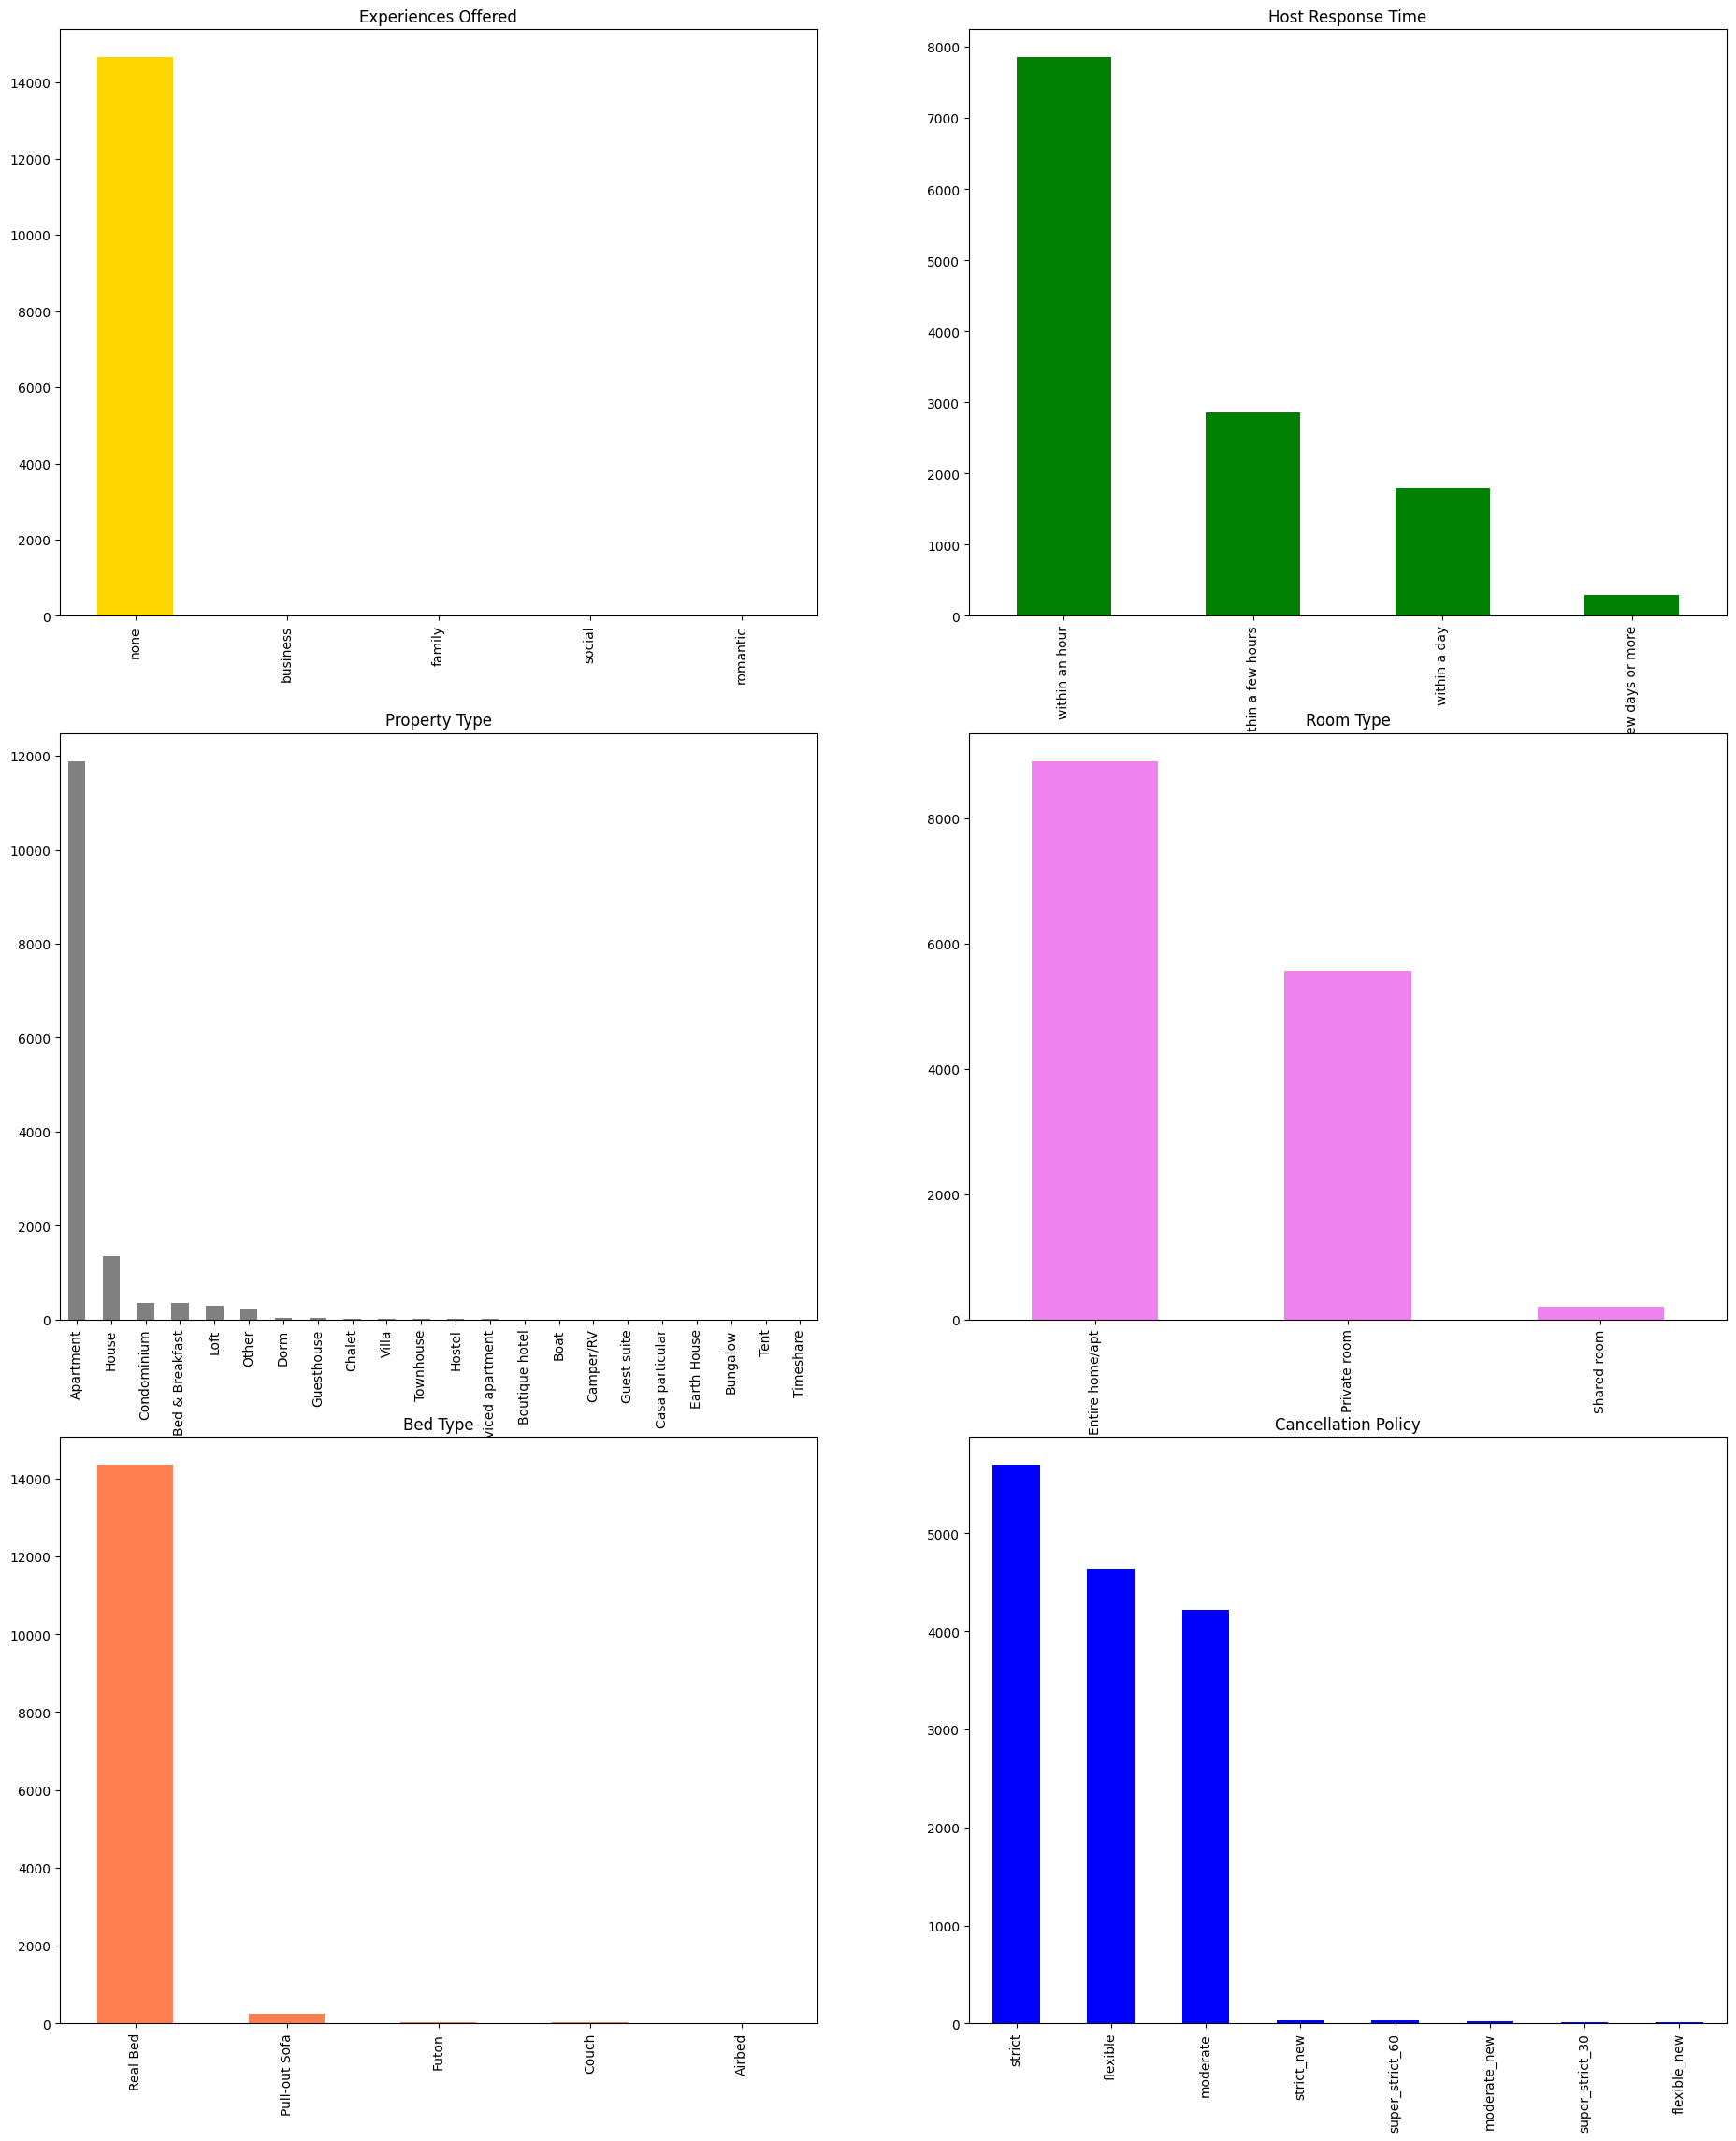

In [ ]:
plt.figure(figsize=(23, 57))

plt.subplot(6, 2, 1)
df['Experiences Offered'].value_counts().plot(kind='bar',color = 'gold',title='Experiences Offered')

plt.subplot(6, 2, 2)
df['Host Response Time'].value_counts().plot(kind='bar',color = 'green',title='Host Response Time')

plt.subplot(6, 2, 3)
df['Property Type'].value_counts().plot(kind='bar',color = 'gray',title='Property Type')

plt.subplot(6, 2, 4)
df['Room Type'].value_counts().plot(kind='bar',color = 'violet',title='Room Type')

plt.subplot(6, 2, 5)
df['Bed Type'].value_counts().plot(kind='bar',color = 'coral',title='Bed Type')

plt.subplot(6, 2, 6)
df['Cancellation Policy'].value_counts().plot(kind='bar',color = 'blue',title='Cancellation Policy')

plt.show()

Experiences Offered:

In [ ]:
df['Experiences Offered'].value_counts()

none        14658
business        8
family          3
social          3
romantic        3
Name: Experiences Offered, dtype: int64

La variable Experiences Offered solo tiene 17 valores distintos a none. La eliminamos al no aportar ninguna información valiosa

In [ ]:
df=df.drop(['Experiences Offered'],axis=1)

Bed Type:

In [ ]:
df['Bed Type'].value_counts()

Real Bed         14352
Pull-out Sofa      257
Futon               42
Couch               19
Airbed               5
Name: Bed Type, dtype: int64

Transformamos la variable Bed Type en una dicotómica compuesta por las categorías Real Bed y Non-Real Bed. Debido al gran desbalanceo que presenta, habrá que tener cuidado al considerar incluirla o no en los modelos.

In [ ]:
df['Bed Type'] = df['Bed Type'].replace(['Pull-out Sofa','Futon', 'Couch','Airbed'],'Not-Real Bed')  

<Axes: title={'center': 'Bed Type'}>

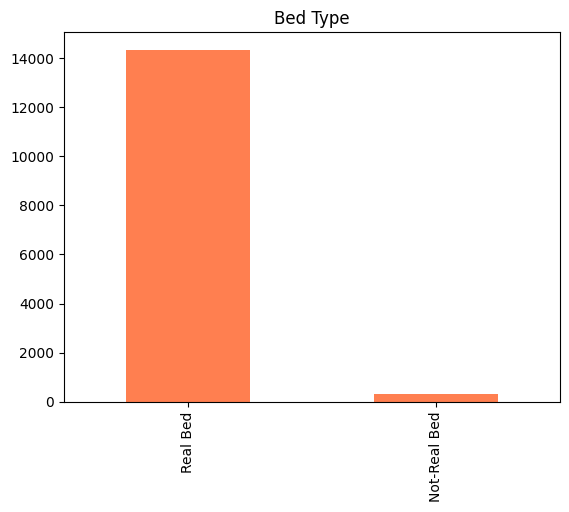

In [ ]:
df['Bed Type'].value_counts().plot(kind='bar',color = 'coral',title='Bed Type')

Cancellation Policy:

In [ ]:
df['Cancellation Policy'].value_counts()

strict             5700
flexible           4643
moderate           4221
strict_new           33
super_strict_60      30
moderate_new         20
super_strict_30      14
flexible_new         14
Name: Cancellation Policy, dtype: int64

Agrupamos las distintas categorías en strict, flexible y moderate para reducir el número de categorías de la variable:

In [ ]:
df['Cancellation Policy'] = df['Cancellation Policy'].replace(['strict_new','super_strict_60','super_strict_30'],'strict')  
df['Cancellation Policy'] = df['Cancellation Policy'].replace(['moderate_new'],'moderate')  
df['Cancellation Policy'] = df['Cancellation Policy'].replace(['flexible_new'],'flexible')  

<Axes: title={'center': 'Cancellation Policy'}>

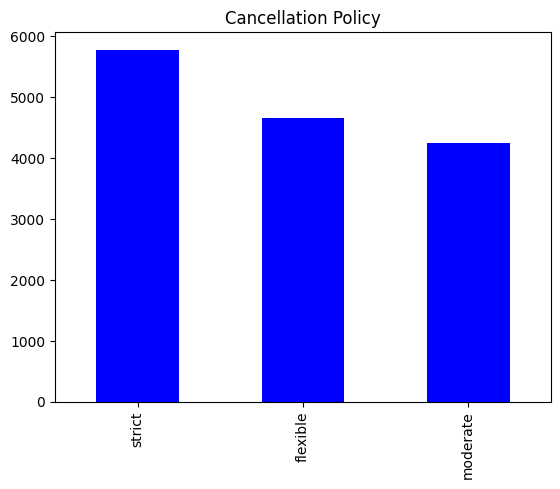

In [ ]:
df['Cancellation Policy'].value_counts().plot(kind='bar',color = 'blue',title='Cancellation Policy')

### ANÁLISIS DE LA VARIABLE OBJETIVO

Veamos como se distribuye nuestra variable objetivo:

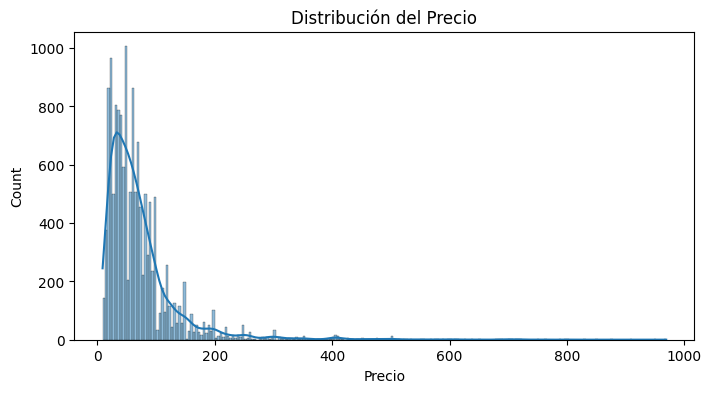

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
sns.histplot(data=df, x='Price', kde=True,ax=ax)
ax.set_title('Distribución del Precio')
ax.set_xlabel('Precio');

La variable precio tiene una distribución asimétrica por la derecha. Esto es natural, al encontrarse un cierto número de alojamientos con un precio muy superior a la media.

<Axes: xlabel='Price'>

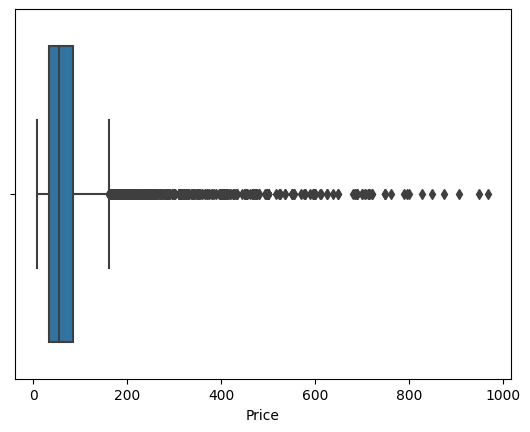

In [ ]:
sns.boxplot(x=df['Price'])

In [ ]:
df['Price'].describe()

count    14664.000000
mean        73.091789
std         70.497496
min          9.000000
25%         34.000000
50%         55.000000
75%         85.000000
max        969.000000
Name: Price, dtype: float64

Observamos que la media es superior a la mediana, como ya sabíamos. El 50% de los alojamientos tiene un precio entre 34 y 86 euros la noche, mientras que el alojamiento más caro es de 969 euros la noche.

### CORRELACIÓN ENTRE VARIABLES

<ipython-input-71-472ef795b0e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(3),annot=True,cmap='coolwarm')


<Axes: >

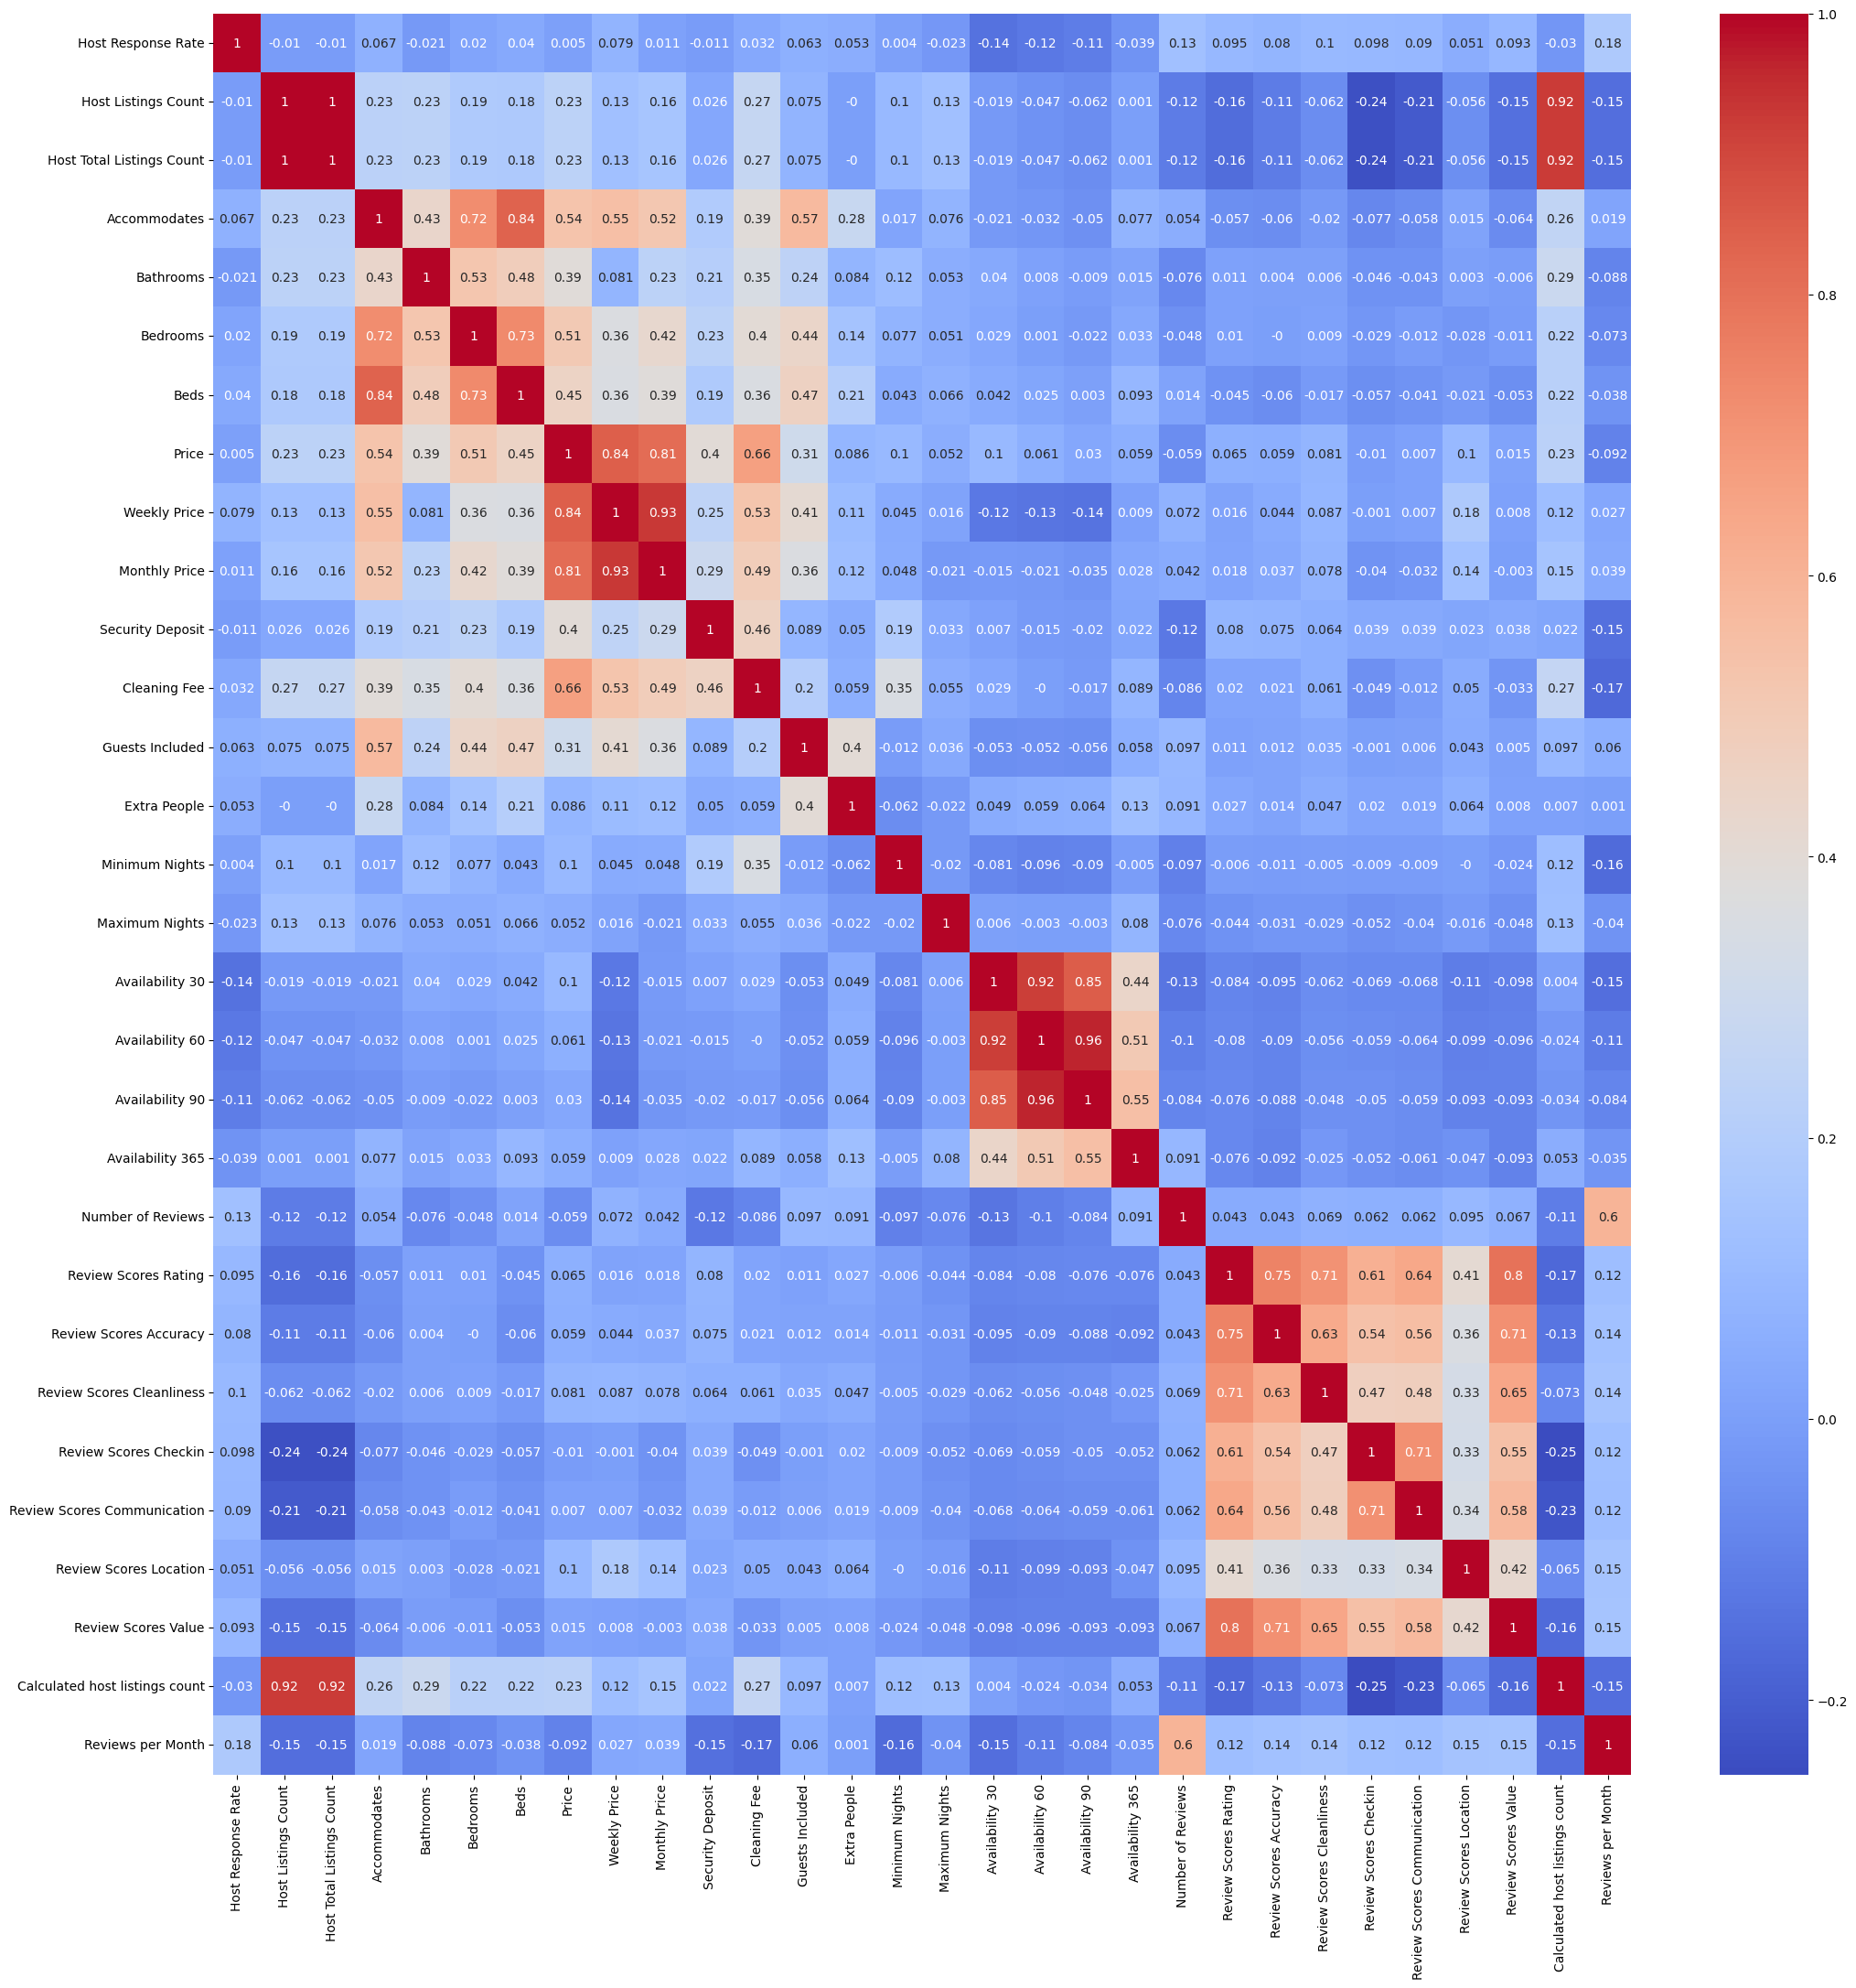

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr().round(3),annot=True,cmap='coolwarm')

En primer lugar, observamos que Host Listings Count y Host Total Listings Count son la misma variable al tener una correlación de 1. Además, estas variables tienen una muy alta correlación (0.92) con Calculated host listings count, por lo que nos quedamos solo con esta última y borramos las otras dos.


 

In [ ]:
df=df.drop(['Host Total Listings Count','Host Listings Count'],axis=1)

Por otro lado, la variable Availability 60 tiene una correlación muy alta con
Availability 30 y Availability 90, por lo que borramos estas dos últimas variables al ser redundantes



In [ ]:
df=df.drop(['Availability 30','Availability 90'],axis=1)

Observamos también que las variables Weekly Price y Monthly Price están altamente correlacionadas con la variable Price, al tener una relación de dependencia muy fuerte. Decidimos borrarlas, ya que consideramos que es hacer 'trampas' incluirlas en el modelo para predecir la variable Price.

In [ ]:
df=df.drop(['Weekly Price','Monthly Price'],axis=1)

Por último, vemos que todas las variables referidas a las reviews del alojamiento tienen una correlación considerable entre ellas. Representamos el pairplot de estas variables para ver la relación que presentan.

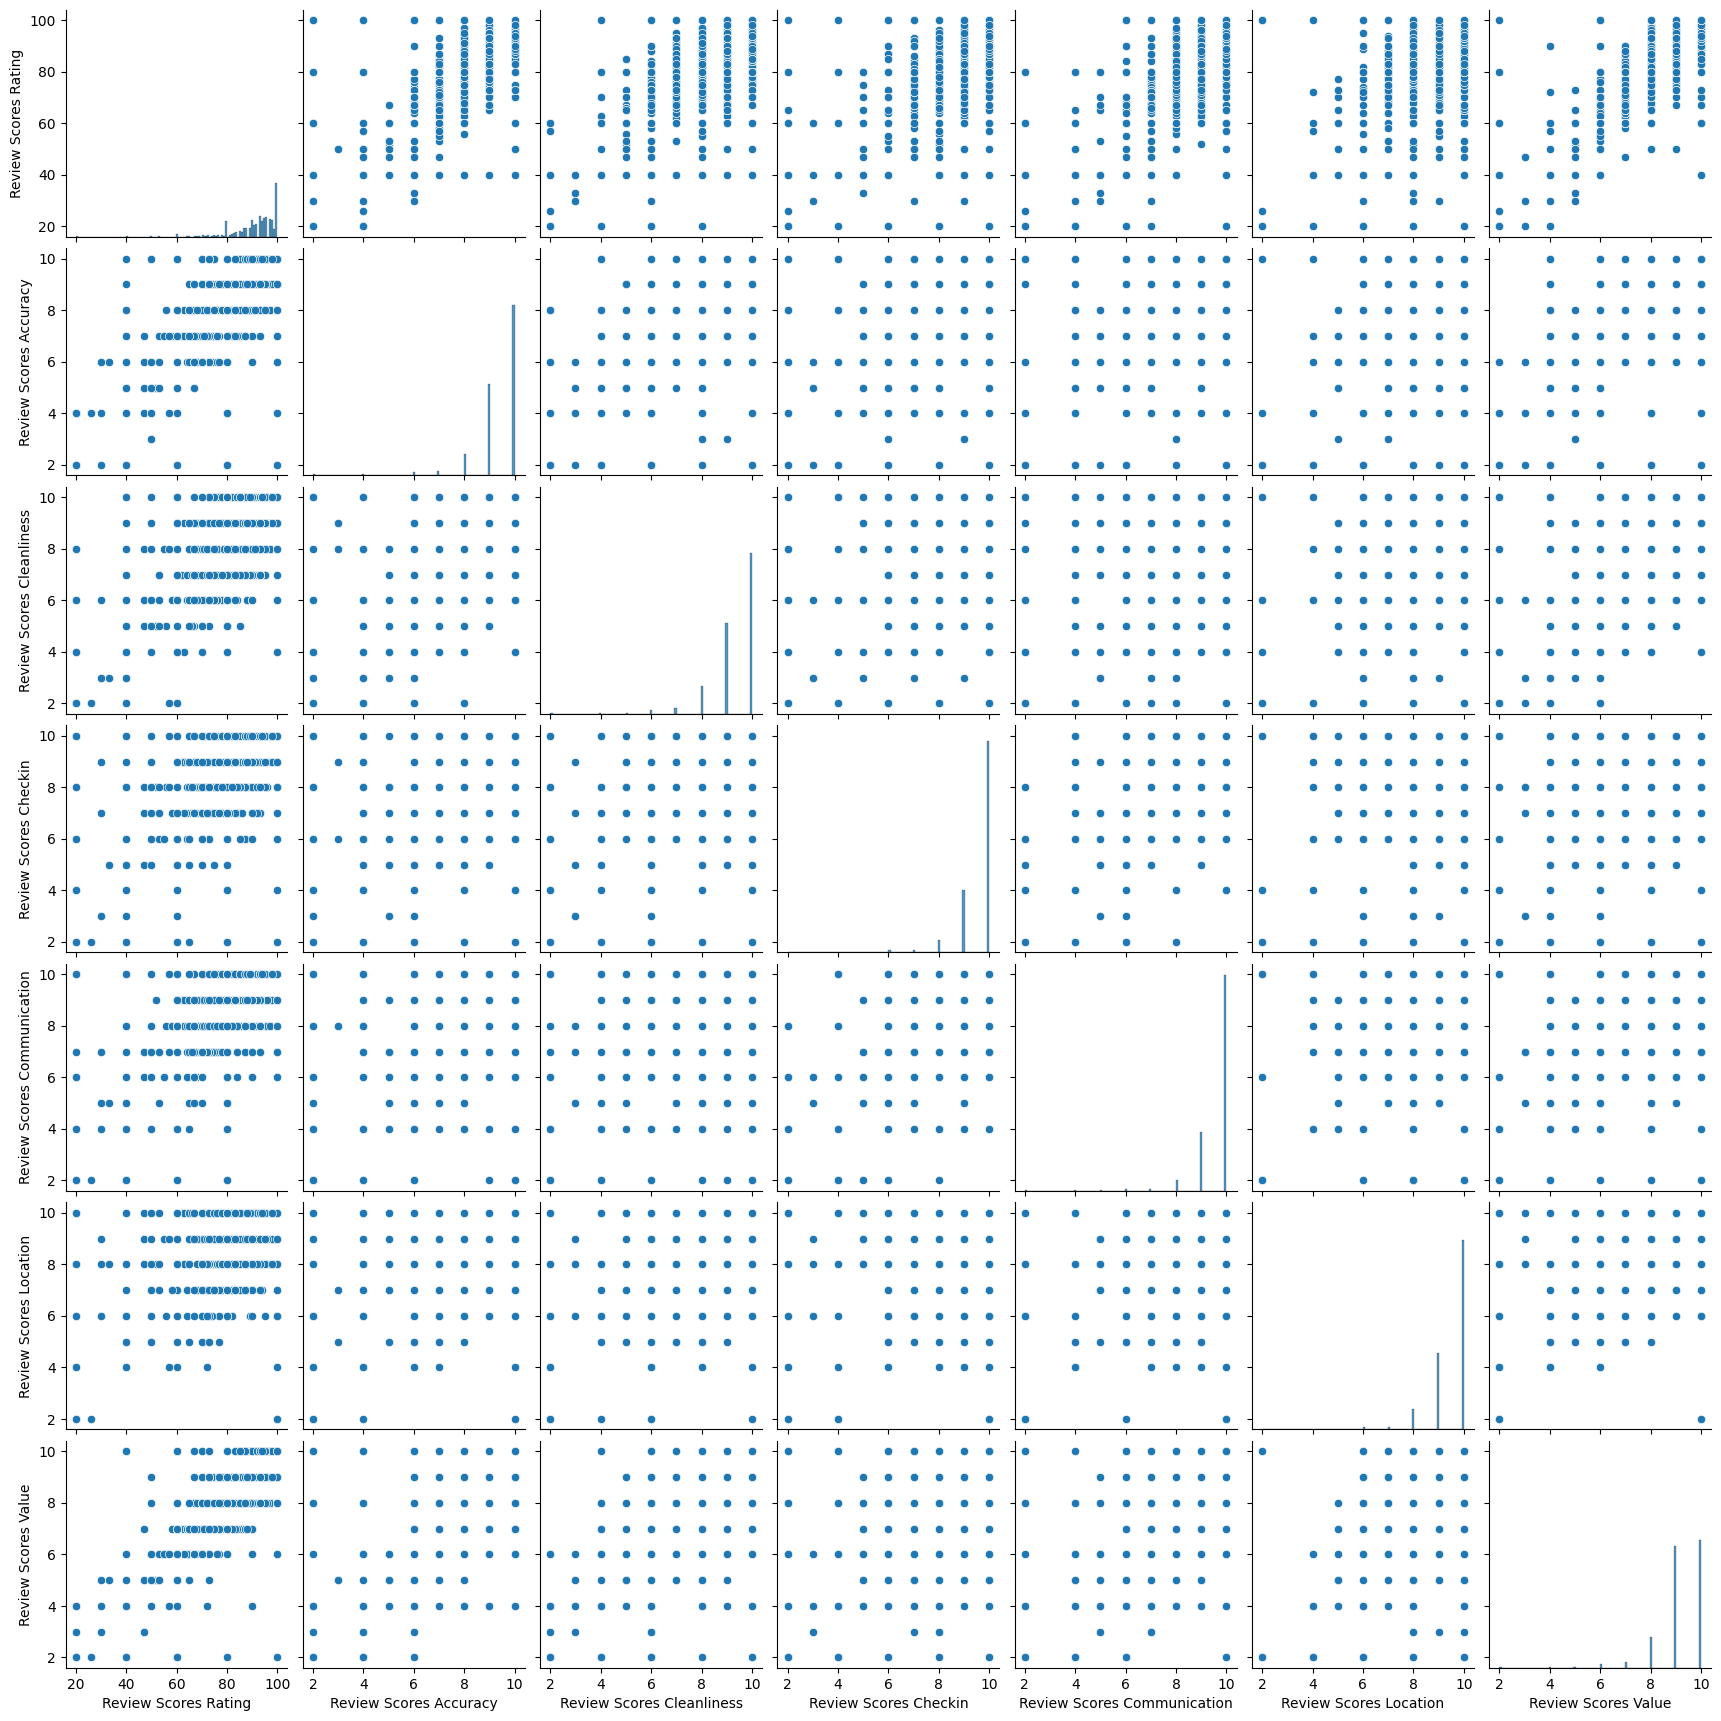

In [ ]:
sns.pairplot(df.loc[:,['Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness',
                         'Review Scores Checkin', 'Review Scores Communication','Review Scores Location',
                         'Review Scores Value']])

Eliminamos todas las variables relacionadas las reviews del alojamiento, exceptuando Review Scores Rating, que engloba al resto, y Review Scores Location, ya que tiene una correlación no muy alta con las demás, y así consideramos otra variable relacionada con la localización. 

De hecho, pensamos que la variable Review Scores Location, es más importante que la variable Country ya que recoge mejor la información sobre la calidad localización del alojamiento. Además como la variable Country estaba muy desbalanceado, pasamos a eliminarla también.



In [ ]:
df=df.drop(['Country'],axis=1)

In [ ]:
df.head()

,Host Since,Host Response Time,Host Response Rate,Host Verifications,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
0,2016-02-11,within an hour,100.0,"email,phone,reviews,kba",Loft,Entire home/apt,2,1.0,1.0,1.0,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50
1,2016-11-08,within an hour,100.0,"email,phone,reviews,work_email",Apartment,Entire home/apt,4,1.0,1.0,1.0,...,80.0,8.0,10.0,10.0,10.0,8.0,10.0,strict,106.0,0.86
2,2016-11-08,within an hour,100.0,"email,phone,reviews,work_email",Apartment,Entire home/apt,4,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,106.0,NaN
3,2010-05-25,within an hour,100.0,"email,phone,facebook,reviews,manual_offline,ju...",Apartment,Entire home/apt,8,2.0,3.0,4.0,...,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09
4,2016-01-12,within an hour,99.0,"email,phone,reviews,jumio",Apartment,Entire home/apt,5,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN


In [ ]:
df=df.drop(['Review Scores Accuracy','Review Scores Cleanliness', 
            'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Value'],axis=1)

<ipython-input-79-472ef795b0e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(3),annot=True,cmap='coolwarm')


<Axes: >

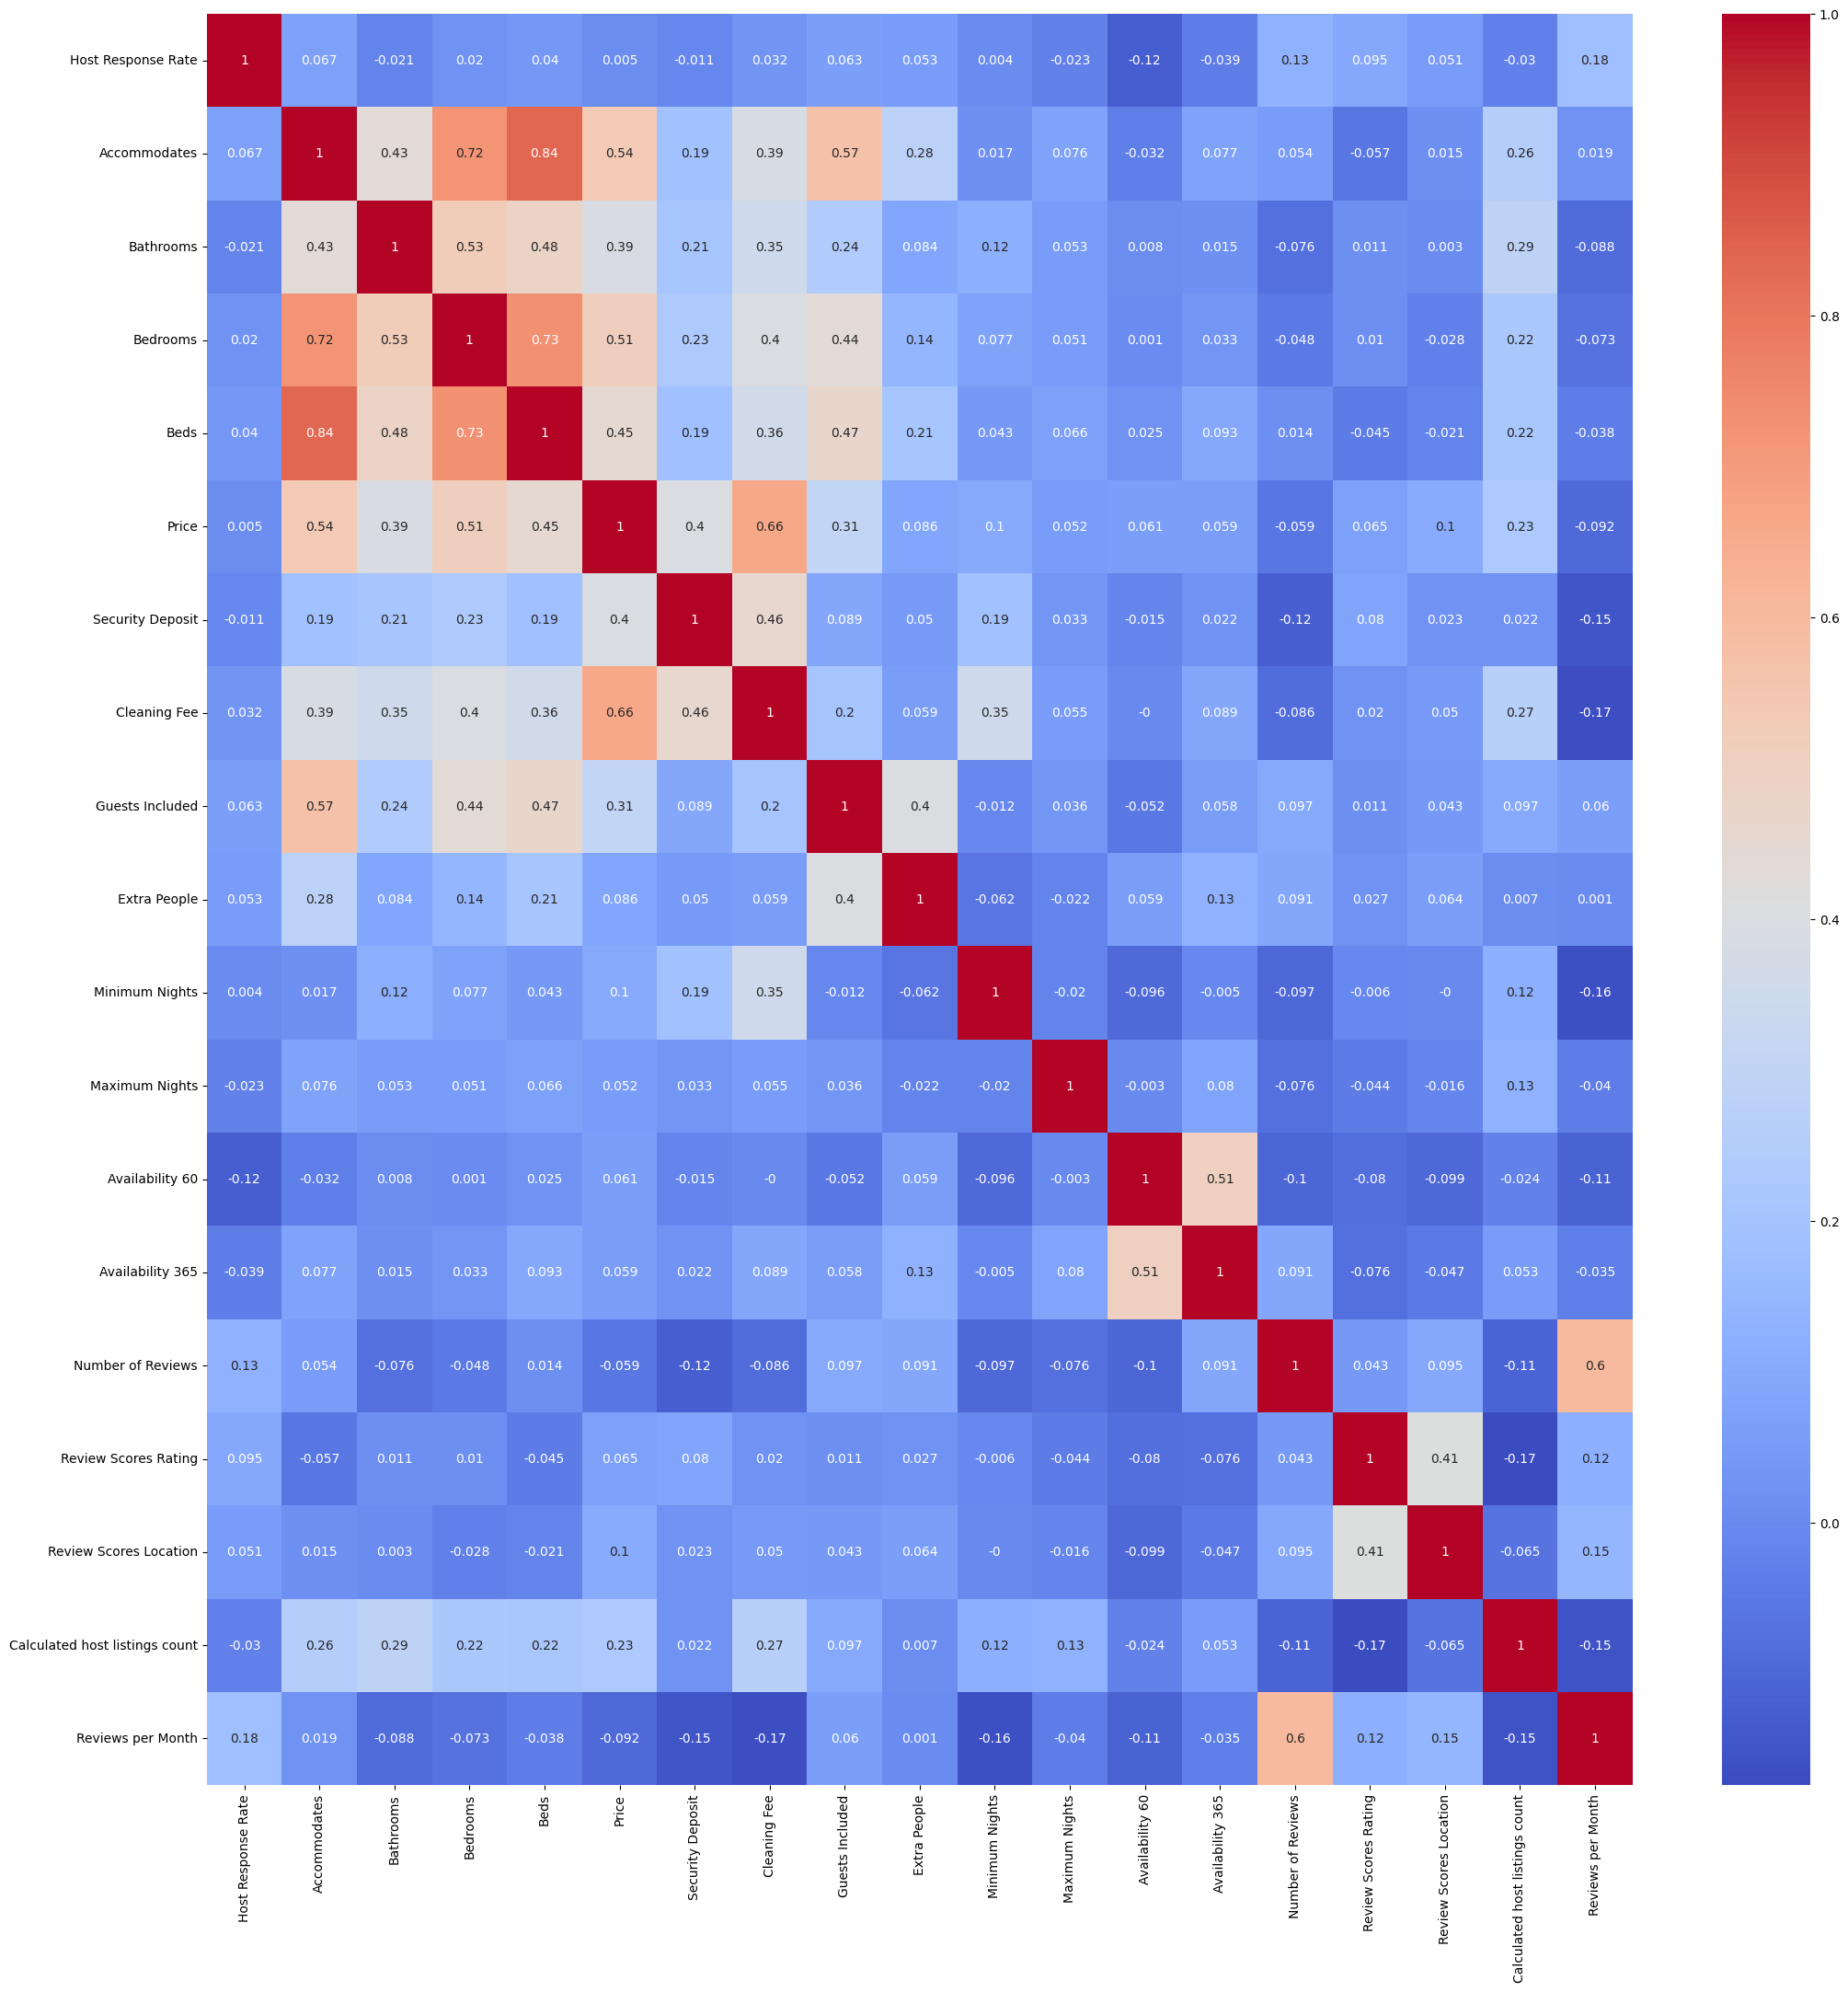

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr().round(3),annot=True,cmap='coolwarm')

## 3. TRANSFORMACIÓN DE VARIABLES E IMPUTACIÓN DE MISSINGS. 
   

En este punto vamos a realizar las transformaciones de las variables oportunas para la construcción de modelo, prestándole especial atención a la transformación de variables cualitativas a cuantitativas por distintos medios.
También realizaremos la imputación de missings.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14675 entries, 0 to 14779
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14672 non-null  object 
 1   Host Response Time              12805 non-null  object 
 2   Host Response Rate              12805 non-null  float64
 3   Host Verifications              14669 non-null  object 
 4   Property Type                   14675 non-null  object 
 5   Room Type                       14675 non-null  object 
 6   Accommodates                    14675 non-null  int64  
 7   Bathrooms                       14620 non-null  float64
 8   Bedrooms                        14650 non-null  float64
 9   Beds                            14626 non-null  float64
 10  Bed Type                        14675 non-null  object 
 11  Amenities                       14513 non-null  object 
 12  Price                           

Todavía tenemos 10 variables tipo object. Esto nos va a dar problemas en la construcción los modelos y la previa imputación de missings. 

Procedemos a transformarlas:

#### Host since:


In [ ]:
df['Host Since']

0        2016-02-11
1        2016-11-08
2        2016-11-08
3        2010-05-25
4        2016-01-12
            ...    
14775    2013-12-18
14776    2017-03-24
14777    2015-07-06
14778    2013-03-20
14779    2014-04-21
Name: Host Since, Length: 14675, dtype: object

Es una variable tipo fecha que vamos a transformar imputando el número de días que un anfitrión lleva en la plataforma. 

Primero eliminamos los missings (solo son 3) para evitar problemas en la transformación.

In [ ]:
df = df.dropna(subset=['Host Since'])

In [ ]:
df['Host Since'].isna().sum()

0

In [ ]:
from datetime import date
today = date.today()
for i in df['Host Since']:
    if isinstance(i, str):
        days = (today - date.fromisoformat(i)).days
        df['Host Since'] = df['Host Since'].replace(i,days) 

In [ ]:
df['Host Since']

0        2672
1        2401
2        2401
3        4760
4        2702
         ... 
14775    3457
14776    2265
14777    2892
14778    3730
14779    3333
Name: Host Since, Length: 14672, dtype: int64

In [ ]:
df['Host Since'].info()

<class 'pandas.core.series.Series'>
Int64Index: 14672 entries, 0 to 14779
Series name: Host Since
Non-Null Count  Dtype
--------------  -----
14672 non-null  int64
dtypes: int64(1)
memory usage: 229.2 KB


#### Host Response Time:

<Axes: title={'center': 'Host Response Time'}>

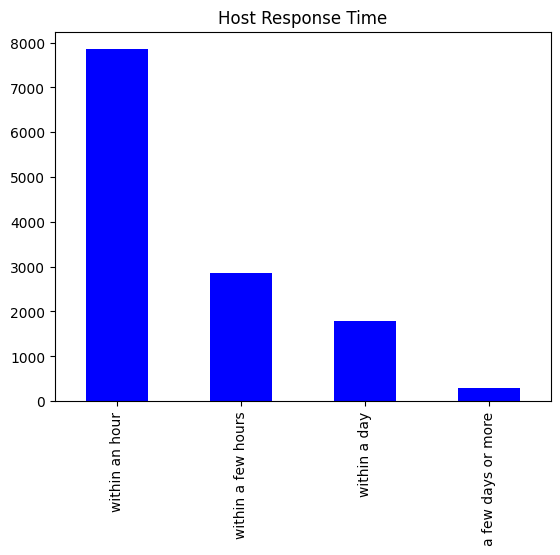

In [ ]:
df['Host Response Time'].value_counts().plot(kind='bar',color = 'blue',title='Host Response Time')

Cuanto menor sea el tiempo de respuesta, mejor será la calificación de la respuesta, y por tanto, a menor tiempo le imputaremos un mayor valor.

In [ ]:
df['Host Response Time'] = df['Host Response Time'].replace(['a few days or more'],0) 
df['Host Response Time'] = df['Host Response Time'].replace(['within a day'],1) 
df['Host Response Time'] = df['Host Response Time'].replace(['within a few hours'],2) 
df['Host Response Time'] = df['Host Response Time'].replace(['within an hour'],3) 

In [ ]:
df['Host Response Time']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
14775    2.0
14776    NaN
14777    3.0
14778    2.0
14779    3.0
Name: Host Response Time, Length: 14672, dtype: float64

Procedemos a imputar los missings, pero antes veamos qué pinta tienen las observaciones con un tiempo de respuesta del anfitrión de .

In [ ]:
df[df['Host Response Time']==0]

,Host Since,Host Response Time,Host Response Rate,Host Verifications,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Calendar Updated,Availability 60,Availability 365,Number of Reviews,Last Review,Review Scores Rating,Review Scores Location,Cancellation Policy,Calculated host listings count,Reviews per Month
69,4758,0.0,0.0,"email,phone,facebook,reviews,jumio",Apartment,Private room,1,2.0,1.0,1.0,...,2 months ago,0,281,0,NaN,NaN,NaN,flexible,2.0,NaN
78,2435,0.0,47.0,"email,phone,reviews,jumio,government_id",Apartment,Entire home/apt,4,1.0,2.0,3.0,...,2 weeks ago,57,173,9,2017-01-05,64.0,7.0,strict,2.0,1.72
82,3519,0.0,0.0,"email,phone,reviews,manual_offline,jumio",Apartment,Entire home/apt,8,1.0,2.0,5.0,...,today,0,82,1,2015-12-01,40.0,8.0,strict,3.0,0.06
168,3152,0.0,0.0,"email,phone,reviews,manual_offline,jumio",Apartment,Entire home/apt,4,2.0,3.0,4.0,...,3 weeks ago,29,304,17,2016-06-03,83.0,8.0,strict,1.0,0.57
183,2916,0.0,0.0,"email,phone,reviews,jumio",Apartment,Private room,1,1.0,1.0,1.0,...,2 months ago,58,178,3,2016-11-18,100.0,9.0,moderate,1.0,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14560,4310,0.0,46.0,"email,phone,facebook,reviews",Apartment,Private room,2,1.0,1.0,1.0,...,yesterday,39,160,87,2017-04-03,93.0,10.0,moderate,1.0,1.29
14588,2696,0.0,0.0,"phone,reviews",Apartment,Private room,1,1.0,1.0,1.0,...,4 months ago,60,365,8,2016-10-04,93.0,9.0,flexible,1.0,0.56
14634,3015,0.0,0.0,"email,phone,reviews",Apartment,Shared room,1,1.0,1.0,1.0,...,25 months ago,60,365,0,NaN,NaN,NaN,flexible,1.0,NaN
14662,2795,0.0,0.0,"email,phone,google,reviews,jumio",House,Private room,1,1.0,1.0,1.0,...,5 months ago,60,365,3,2016-12-02,87.0,9.0,flexible,1.0,0.23


Observamos que la mayoría de observaciones con tiempo de respuesta 1, coinciden con una proporción de respuesta de 0. Esto puede ser debido a que corresponden a anfitriones que nunca contestan.

Veamos si el número de missings coincide en las dos variables también:

In [ ]:
df['Host Response Time'].isna().sum()==df['Host Response Rate'].isna().sum()

True

In [ ]:
df[df['Host Response Rate'].isna()]

,Host Since,Host Response Time,Host Response Rate,Host Verifications,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Calendar Updated,Availability 60,Availability 365,Number of Reviews,Last Review,Review Scores Rating,Review Scores Location,Cancellation Policy,Calculated host listings count,Reviews per Month
11,3457,NaN,NaN,"email,phone,reviews,jumio,work_email",Apartment,Entire home/apt,2,1.0,1.0,1.0,...,7 months ago,3,308,7,2016-07-07,97.0,10.0,strict,1.0,0.43
22,2541,NaN,NaN,"email,phone,reviews",Apartment,Entire home/apt,4,2.0,2.0,3.0,...,8 months ago,0,0,1,2016-08-20,100.0,10.0,moderate,1.0,0.13
34,3358,NaN,NaN,"email,phone,jumio",Apartment,Entire home/apt,1,1.0,1.0,1.0,...,2 months ago,60,90,1,2015-05-01,NaN,NaN,flexible,1.0,0.04
36,3320,NaN,NaN,"email,phone,jumio",Apartment,Private room,2,1.0,1.0,1.0,...,13 months ago,0,0,0,NaN,NaN,NaN,flexible,1.0,NaN
38,3652,NaN,NaN,"email,phone,reviews,jumio",Apartment,Entire home/apt,6,1.0,1.0,3.0,...,7 months ago,0,0,8,2016-01-05,93.0,9.0,strict,1.0,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14743,2518,NaN,NaN,phone,Apartment,Private room,1,2.0,1.0,1.0,...,7 months ago,0,282,0,NaN,NaN,NaN,flexible,1.0,NaN
14760,3505,NaN,NaN,"email,phone,reviews,jumio",Apartment,Entire home/apt,3,1.0,1.0,2.0,...,6 months ago,0,0,3,2016-08-05,93.0,10.0,moderate,1.0,0.11
14762,3542,NaN,NaN,"email,phone,reviews",Apartment,Entire home/apt,6,1.0,2.0,4.0,...,4 weeks ago,16,150,6,2016-11-20,88.0,9.0,strict,2.0,0.30
14774,4378,NaN,NaN,"email,phone,facebook,reviews,kba",Apartment,Private room,1,1.0,1.0,1.0,...,11 months ago,0,0,1,2015-08-18,80.0,NaN,moderate,1.0,0.05


Todo apunta que los missings en ambas variables son debidos a que el anfitrión del correspondiente alojamiento nunca ha contestado. Procedemos a imputar los missings con el valor 0 en la proporción de respuesta, y 0 en el tiempo de respuesta.

In [ ]:
df.fillna({'Host Response Time': 0}, inplace=True)
df.fillna({'Host Response Rate': 0}, inplace=True)

In [ ]:
df['Host Response Time'].isna().sum()

0

In [ ]:
df['Host Response Rate'].isna().sum()

0

In [ ]:
df['Host Response Time'].info()

<class 'pandas.core.series.Series'>
Int64Index: 14672 entries, 0 to 14779
Series name: Host Response Time
Non-Null Count  Dtype  
--------------  -----  
14672 non-null  float64
dtypes: float64(1)
memory usage: 229.2 KB


#### Host Verifications:

In [ ]:
df['Host Verifications']

0                                  email,phone,reviews,kba
1                           email,phone,reviews,work_email
2                           email,phone,reviews,work_email
3        email,phone,facebook,reviews,manual_offline,ju...
4                                email,phone,reviews,jumio
                               ...                        
14775                            email,phone,reviews,jumio
14776                                          email,phone
14777                            email,phone,reviews,jumio
14778          email,phone,facebook,linkedin,reviews,jumio
14779     email,phone,facebook,google,linkedin,reviews,kba
Name: Host Verifications, Length: 14672, dtype: object

Para transformar los strings a valores numéricos, vamos a contar cada forma de verificación (palabra), e imputar el número de verificaciones como valor de la variable. A mayor número de verificaciones, mejor.

In [ ]:
for i in df['Host Verifications']:
    if isinstance(i, str):
        df['Host Verifications'] = df['Host Verifications'].replace(i,len(i.split(sep=','))) 

In [ ]:
df['Host Verifications']

0        4.0
1        4.0
2        4.0
3        7.0
4        4.0
        ... 
14775    4.0
14776    2.0
14777    4.0
14778    6.0
14779    7.0
Name: Host Verifications, Length: 14672, dtype: float64

Procedemos a la imputación de missings:

In [ ]:
df['Host Verifications'].isna().sum()

6

In [ ]:
df['Host Verifications'].value_counts()

4.0     4965
3.0     3811
5.0     2704
6.0     1542
2.0      822
7.0      531
1.0      193
8.0       70
9.0       25
10.0       3
Name: Host Verifications, dtype: int64

Observamos que hay 6 missings y que no hay ninguna observación con 0 verificaciones. Esto se debe muy probablemente a que aquellos anfitriones que no tienen ninguna verificación, resultan valores missing en la variable Host Verifications. Por tanto, imputamos los missings como 0

In [ ]:
df.fillna({'Host Verifications': 0}, inplace=True)

In [ ]:
df['Host Verifications'].isna().sum()

0

In [ ]:
df['Host Verifications'].value_counts()

4.0     4965
3.0     3811
5.0     2704
6.0     1542
2.0      822
7.0      531
1.0      193
8.0       70
9.0       25
0.0        6
10.0       3
Name: Host Verifications, dtype: int64

Veamos cómo van quedando nuestras variables:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14672 entries, 0 to 14779
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14672 non-null  int64  
 1   Host Response Time              14672 non-null  float64
 2   Host Response Rate              14672 non-null  float64
 3   Host Verifications              14672 non-null  float64
 4   Property Type                   14672 non-null  object 
 5   Room Type                       14672 non-null  object 
 6   Accommodates                    14672 non-null  int64  
 7   Bathrooms                       14617 non-null  float64
 8   Bedrooms                        14647 non-null  float64
 9   Beds                            14623 non-null  float64
 10  Bed Type                        14672 non-null  object 
 11  Amenities                       14510 non-null  object 
 12  Price                           

In [ ]:
df.isna().sum()

Host Since                           0
Host Response Time                   0
Host Response Rate                   0
Host Verifications                   0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                           55
Bedrooms                            25
Beds                                49
Bed Type                             0
Amenities                          162
Price                               11
Security Deposit                  8465
Cleaning Fee                      6055
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Calendar Updated                     0
Availability 60                      0
Availability 365                     0
Number of Reviews                    0
Last Review                       3116
Review Scores Rating              3254
Review Scores Location   

### Property type, Room Type y Bed Type:

Estas tres variables no tienen missings. Procedemos a su transformación a variable cuantitativa.

In [ ]:
df['Property Type']

0                   Loft
1              Apartment
2              Apartment
3              Apartment
4              Apartment
              ...       
14775          Apartment
14776    Bed & Breakfast
14777          Apartment
14778          Apartment
14779              House
Name: Property Type, Length: 14672, dtype: object

<Axes: title={'center': 'Property Type'}>

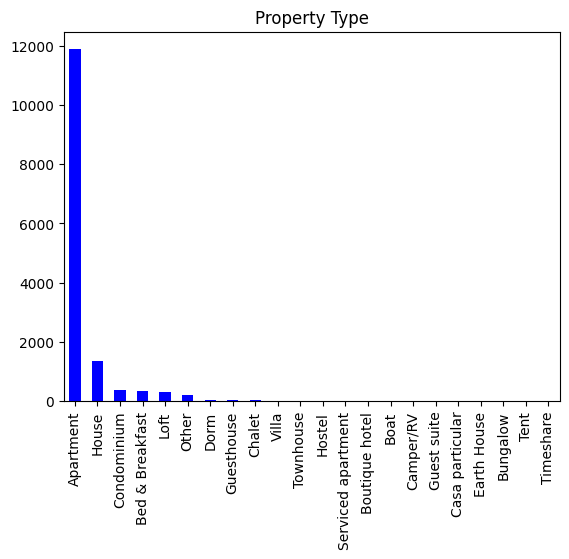

In [ ]:
df['Property Type'].value_counts().plot(kind='bar',color = 'blue',title='Property Type')

In [ ]:
df['Room Type']

0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
14775    Entire home/apt
14776       Private room
14777    Entire home/apt
14778    Entire home/apt
14779       Private room
Name: Room Type, Length: 14672, dtype: object

<Axes: title={'center': 'Room Type'}>

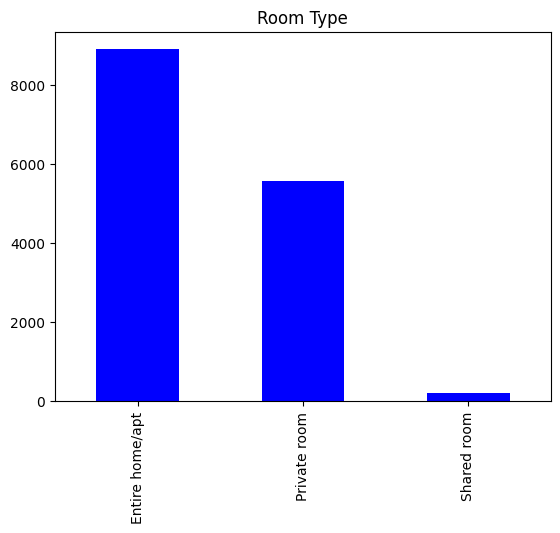

In [ ]:
df['Room Type'].value_counts().plot(kind='bar',color = 'blue',title='Room Type')

In [ ]:
df['Bed Type']

0        Real Bed
1        Real Bed
2        Real Bed
3        Real Bed
4        Real Bed
           ...   
14775    Real Bed
14776    Real Bed
14777    Real Bed
14778    Real Bed
14779    Real Bed
Name: Bed Type, Length: 14672, dtype: object

<Axes: title={'center': 'Bed Type'}>

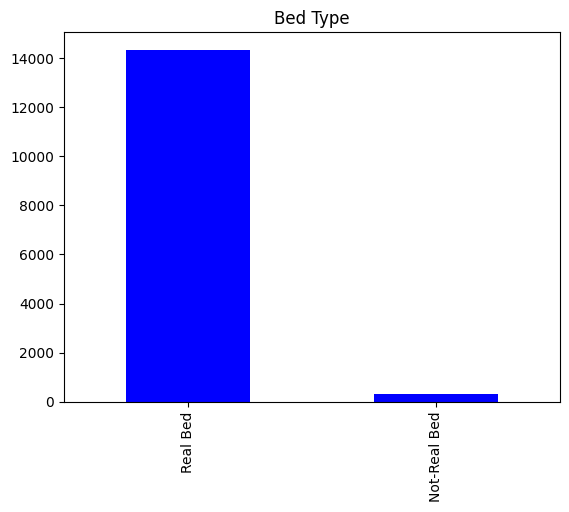

In [ ]:
df['Bed Type'].value_counts().plot(kind='bar',color = 'blue',title='Bed Type')

Le asignamos una etiqueta a cada categoría a través de LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for i in df.iloc[:,[4,5,10]]:
    df[i]=df[[i]].apply(LE.fit_transform)

In [ ]:
df['Property Type']

0        15
1         0
2         0
3         0
4         0
         ..
14775     0
14776     1
14777     0
14778     0
14779    14
Name: Property Type, Length: 14672, dtype: int64

In [ ]:
df['Room Type']

0        0
1        0
2        0
3        0
4        0
        ..
14775    0
14776    1
14777    0
14778    0
14779    1
Name: Room Type, Length: 14672, dtype: int64

In [ ]:
df['Bed Type']

0        1
1        1
2        1
3        1
4        1
        ..
14775    1
14776    1
14777    1
14778    1
14779    1
Name: Bed Type, Length: 14672, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14672 entries, 0 to 14779
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14672 non-null  int64  
 1   Host Response Time              14672 non-null  float64
 2   Host Response Rate              14672 non-null  float64
 3   Host Verifications              14672 non-null  float64
 4   Property Type                   14672 non-null  int64  
 5   Room Type                       14672 non-null  int64  
 6   Accommodates                    14672 non-null  int64  
 7   Bathrooms                       14617 non-null  float64
 8   Bedrooms                        14647 non-null  float64
 9   Beds                            14623 non-null  float64
 10  Bed Type                        14672 non-null  int64  
 11  Amenities                       14510 non-null  object 
 12  Price                           

In [ ]:
df.isna().sum()

Host Since                           0
Host Response Time                   0
Host Response Rate                   0
Host Verifications                   0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                           55
Bedrooms                            25
Beds                                49
Bed Type                             0
Amenities                          162
Price                               11
Security Deposit                  8465
Cleaning Fee                      6055
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Calendar Updated                     0
Availability 60                      0
Availability 365                     0
Number of Reviews                    0
Last Review                       3116
Review Scores Rating              3254
Review Scores Location   

#### Bathrooms y Bedrooms:

Al ser variables cuantitativas, lo único que tenemos que hacer es analizar los missings.

De primeras hemos pensados que los valores missing pueden indicar que el alojamiento no posee la correspondiente parte de la casa. Veamos si no hay alojamientos que se le haya imputado el valor 0 en estas dos variables.

In [ ]:
(df.Bedrooms==0).sum()

992

In [ ]:
(df.Bathrooms==0).sum()

64

Al haber alojamientos con 0 habitaciones o 0 baños, pensamos que los missings se deben a errores de recogida de la información (habría que hacer una investigación más a fondo, preguntando a los propietarios de los alojamientos si fuese posible). Vamos a imputar estos missings por el método de los K vecinos, con k=10 para no caer en la maldición de la dimensionalidad.

In [ ]:
knn = KNNImputer(n_neighbors=10)
df["Bathrooms"] = np.around(knn.fit_transform(df["Bathrooms"].values.reshape(-1, 1)),decimals=0)
df["Bedrooms"] = np.around(knn.fit_transform(df["Bedrooms"].values.reshape(-1, 1)),decimals=0)

In [ ]:
df['Bedrooms'].isna().sum()

0

In [ ]:
df['Bathrooms'].isna().sum()

0

Beds:

Vamos a analizar los missings de la variable Beds

In [ ]:
df['Beds'].isna().sum()

49

In [ ]:
(df.Beds==0).sum()

0

In [ ]:
df['Bed Type'].value_counts()

1    14349
0      323
Name: Bed Type, dtype: int64

En este caso no hay ningún alojamiento con 0 camas, y tenemos 49 missings, un número menor a 323, que es el número de observaciones que toman el valor Not-Real Bed en la variable Bed Type. Por tanto, decidimos imputar los missings de Beds como 0, haciendo referencia a que no hay camas reales en el alojamiento, pero sí camas de otro tipo (sofá-cama,...)

In [ ]:
df.fillna({'Beds': 0}, inplace=True)

In [ ]:
df['Beds'].isna().sum()

0

#### Amenities

In [ ]:
df['Amenities']

0        TV,Cable TV,Internet,Wireless Internet,Air con...
1        Wireless Internet,Air conditioning,Elevator in...
2        Wireless Internet,Air conditioning,Elevator in...
3        TV,Internet,Wireless Internet,Air conditioning...
4        TV,Wireless Internet,Air conditioning,Kitchen,...
                               ...                        
14775    TV,Cable TV,Internet,Wireless Internet,Air con...
14776    TV,Wireless Internet,Kitchen,Breakfast,Elevato...
14777    TV,Cable TV,Internet,Wireless Internet,Air con...
14778    Internet,Wireless Internet,Kitchen,Heating,Was...
14779    TV,Cable TV,Internet,Wireless Internet,Air Con...
Name: Amenities, Length: 14672, dtype: object

El caso de la variable Amenities es análogo al de Verifications. Transformamos la variable imputando el número de amenidades que hay en el alojamiento, y si hay missings, les imputamos el valos 0, indicando que el alojamiento no tiene amenidades.

In [ ]:
for i in df['Amenities']:
    if isinstance(i, str):
        df['Amenities'] = df['Amenities'].replace(i,len(i.split(sep=',')))

In [ ]:
df['Amenities']

0        23.0
1         7.0
2         7.0
3        24.0
4        12.0
         ... 
14775    11.0
14776    11.0
14777    17.0
14778    18.0
14779    21.0
Name: Amenities, Length: 14672, dtype: float64

In [ ]:
df['Amenities'].isna().sum()

162

In [ ]:
df.fillna({'Amenities': 0}, inplace=True)

In [ ]:
df['Amenities'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14672 entries, 0 to 14779
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14672 non-null  int64  
 1   Host Response Time              14672 non-null  float64
 2   Host Response Rate              14672 non-null  float64
 3   Host Verifications              14672 non-null  float64
 4   Property Type                   14672 non-null  int64  
 5   Room Type                       14672 non-null  int64  
 6   Accommodates                    14672 non-null  int64  
 7   Bathrooms                       14672 non-null  float64
 8   Bedrooms                        14672 non-null  float64
 9   Beds                            14672 non-null  float64
 10  Bed Type                        14672 non-null  int64  
 11  Amenities                       14672 non-null  float64
 12  Price                           

In [ ]:
df.isna().sum()

Host Since                           0
Host Response Time                   0
Host Response Rate                   0
Host Verifications                   0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                            0
Bedrooms                             0
Beds                                 0
Bed Type                             0
Amenities                            0
Price                               11
Security Deposit                  8465
Cleaning Fee                      6055
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Calendar Updated                     0
Availability 60                      0
Availability 365                     0
Number of Reviews                    0
Last Review                       3116
Review Scores Rating              3254
Review Scores Location   

Calendar Updated:

In [ ]:
df['Calendar Updated'].value_counts()

today            3893
2 weeks ago      1205
yesterday        1200
a week ago       1132
3 days ago        836
4 days ago        664
2 months ago      565
3 weeks ago       555
5 days ago        531
4 weeks ago       437
2 days ago        387
5 weeks ago       351
3 months ago      339
6 weeks ago       264
4 months ago      238
6 days ago        223
5 months ago      202
6 months ago      190
9 months ago      161
7 months ago      156
7 weeks ago       143
8 months ago      136
never             113
10 months ago      97
1 week ago         93
11 months ago      72
12 months ago      50
14 months ago      49
15 months ago      48
13 months ago      46
16 months ago      43
21 months ago      41
17 months ago      33
20 months ago      33
22 months ago      32
19 months ago      30
18 months ago      27
24 months ago      11
23 months ago      11
29 months ago       6
26 months ago       4
25 months ago       3
48 months ago       3
28 months ago       2
30 months ago       2
52 months 

Observamos que la variable Calendar Updated puede tomar demasiados valores, y por tanto su transformación a variable cuantitativa puede resultar demasiado engorrosa y puede llegar a dar problemas si no se hace de forma adecuada. Además, consideramos que no es una variable muy importante a la hora de predecir el precio, por tanto, procedemos a eliminarla

In [ ]:
df=df.drop(['Calendar Updated'],axis=1)

Last Review:

In [ ]:
df['Last Review']

0        2017-02-26
1        2017-03-05
2               NaN
3        2017-03-02
4               NaN
            ...    
14775    2017-04-22
14776           NaN
14777    2017-03-26
14778    2016-04-17
14779    2015-10-27
Name: Last Review, Length: 14672, dtype: object

La variable es de tipo fecha y la transformamos de la misma forma que Host Since.

In [ ]:
from datetime import date
today = date.today()
for i in df['Last Review']:
    if isinstance(i, str):
        days = (today - date.fromisoformat(i)).days
        df['Last Review'] = df['Last Review'].replace(i,days) 

In [ ]:
df['Last Review']

0        2291.0
1        2284.0
2           NaN
3        2287.0
4           NaN
          ...  
14775    2236.0
14776       NaN
14777    2263.0
14778    2606.0
14779    2779.0
Name: Last Review, Length: 14672, dtype: float64

En cuanto a los missings, entendemos que se deben a que nunca han recibido una review. Por lo tanto, las vamos a penalizar imputandoles el valor del máximo del tiempo de la última review

In [ ]:
df['Last Review'].isna().sum()

3116

In [ ]:
df['Last Review'].max()

3958.0

In [ ]:
df.fillna({'Last Review': 3958.0}, inplace=True)

In [ ]:
df['Last Review'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14672 entries, 0 to 14779
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14672 non-null  int64  
 1   Host Response Time              14672 non-null  float64
 2   Host Response Rate              14672 non-null  float64
 3   Host Verifications              14672 non-null  float64
 4   Property Type                   14672 non-null  int64  
 5   Room Type                       14672 non-null  int64  
 6   Accommodates                    14672 non-null  int64  
 7   Bathrooms                       14672 non-null  float64
 8   Bedrooms                        14672 non-null  float64
 9   Beds                            14672 non-null  float64
 10  Bed Type                        14672 non-null  int64  
 11  Amenities                       14672 non-null  float64
 12  Price                           

Cancellation Policy:

In [ ]:
df['Cancellation Policy'].value_counts()

strict      5777
flexible    4654
moderate    4241
Name: Cancellation Policy, dtype: int64

Transformamos la variable a través de Label Encoder

In [ ]:
LE=LabelEncoder()
for i in df.iloc[:,[25]]:
    df[i]=df[[i]].apply(LE.fit_transform)

In [ ]:
df['Cancellation Policy'].value_counts()

2    5777
0    4654
1    4241
Name: Cancellation Policy, dtype: int64

In [ ]:
df['Cancellation Policy'].isna().sum()

0

Ya hemos transformado todas las variables cualitativas en cuantitativas, solo nos queda analizar los missings de las variables que todavía tienen.

In [ ]:
df.isna().sum()

Host Since                           0
Host Response Time                   0
Host Response Rate                   0
Host Verifications                   0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                            0
Bedrooms                             0
Beds                                 0
Bed Type                             0
Amenities                            0
Price                               11
Security Deposit                  8465
Cleaning Fee                      6055
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Availability 60                      0
Availability 365                     0
Number of Reviews                    0
Last Review                          0
Review Scores Rating              3254
Review Scores Location            3290
Cancellation Policy      

### Price:

Price es nuestra variable objetivo. Por lo tanto, no nos interesa imputar missings ya que puede llevar a errores en el modelo. Además sólo hay 11, procedemos a eliminarlos.

In [ ]:
df = df.dropna(subset=['Price'])

#### Security Deposit y Cleaning Fee

In [ ]:
(df['Security Deposit']==0).sum()

2

In [ ]:
(df['Cleaning Fee']==0).sum()

1

Ambas variables tienen un gran número de missings, además, solo en 2 y 1 caso se les ha imputado directamente el valor 0. Sabiendo que hay muchos alojamientos en los que no existen estas tarifas, y teniendo en cuenta que entonces los caseros no rellenan estos apartados en ese caso, vamos a imputar el valor 0 a los missings.

In [ ]:
df.fillna({'Security Deposit': 0}, inplace=True)
df.fillna({'Cleaning Fee': 0}, inplace=True)

In [ ]:
df.isna().sum()

Host Since                           0
Host Response Time                   0
Host Response Rate                   0
Host Verifications                   0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                            0
Bedrooms                             0
Beds                                 0
Bed Type                             0
Amenities                            0
Price                                0
Security Deposit                     0
Cleaning Fee                         0
Guests Included                      0
Extra People                         0
Minimum Nights                       0
Maximum Nights                       0
Availability 60                      0
Availability 365                     0
Number of Reviews                    0
Last Review                          0
Review Scores Rating              3249
Review Scores Location            3285
Cancellation Policy      

#### Review Scores Rating, Review Scores Location y Reviews Per Month

In [ ]:
df[df['Review Scores Rating'].isna()].T

,2,4,5,12,20,34,36,39,44,61,...,14732,14738,14743,14747,14758,14768,14770,14771,14773,14776
Host Since,2401.0,2702.0,2702.0,2401.0,3043.0,3358.00,3320.0,2705.0,3450.0,4052.0,...,2435.0,2386.0,2518.0,3252.0,3550.0,3574.0,2327.0,3207.0,3729.0,2265.0
Host Response Time,3.0,3.0,3.0,3.0,2.0,0.00,0.0,2.0,3.0,2.0,...,1.0,3.0,0.0,1.0,3.0,3.0,2.0,0.0,1.0,0.0
Host Response Rate,100.0,99.0,99.0,100.0,100.0,0.00,0.0,100.0,100.0,67.0,...,100.0,90.0,0.0,50.0,100.0,100.0,100.0,33.0,96.0,0.0
Host Verifications,4.0,4.0,4.0,4.0,4.0,3.00,3.0,6.0,5.0,2.0,...,2.0,8.0,1.0,6.0,4.0,4.0,7.0,3.0,4.0,2.0
Property Type,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,21.0,14.0,14.0,14.0,1.0
Room Type,0.0,0.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,0.0,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Accommodates,4.0,5.0,6.0,4.0,2.0,1.00,2.0,5.0,6.0,1.0,...,6.0,1.0,1.0,2.0,8.0,10.0,8.0,2.0,8.0,1.0
Bathrooms,1.0,1.0,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,4.0,4.0,1.0,2.0,3.0,1.0
Bedrooms,1.0,2.0,2.0,1.0,1.0,1.00,1.0,2.0,2.0,1.0,...,2.0,1.0,1.0,1.0,4.0,5.0,3.0,1.0,4.0,1.0
Beds,1.0,2.0,3.0,1.0,1.0,1.00,1.0,5.0,3.0,1.0,...,2.0,1.0,1.0,2.0,5.0,5.0,6.0,1.0,8.0,2.0


Los missings en la variable Reviews per Month son ceros en la variable Number of Reviews. Por tanto, imputamos el valor 0 en estos casos

In [ ]:
df.fillna({'Reviews per Month': 0}, inplace=True)

Los missing en Review Scores Rating y Review Scores Location son ceros o unos en la variable Number of Reviews. Por tanto, estos se deben a que no hay reviews suficientes como para hacer un promedio. En este caso, la imputación del valor 0 no sería correcta, ya que por mucho que no haya reseñas, esto no quiere decir que sus puntuaciones vayan a ser de 0. Por tanto, procedemos a imputar estos missing a través del método KNN con 10 vecinos cercanos.

In [ ]:
knn = KNNImputer(n_neighbors=10)
df["Review Scores Rating"] = np.around(knn.fit_transform(df["Review Scores Rating"].values.reshape(-1, 1)),decimals=0)
df["Review Scores Location"] = np.around(knn.fit_transform(df["Review Scores Location"].values.reshape(-1, 1)),decimals=0)

In [ ]:
df.isna().sum()

Host Since                        0
Host Response Time                0
Host Response Rate                0
Host Verifications                0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                         0
Price                             0
Security Deposit                  0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 60                   0
Availability 365                  0
Number of Reviews                 0
Last Review                       0
Review Scores Rating              0
Review Scores Location            0
Cancellation Policy               0
Calculated host listings count    4
Reviews per Month           

### Calculated host listings count:

In [ ]:
df['Calculated host listings count']

0          1.0
1        106.0
2        106.0
3         24.0
4         92.0
         ...  
14775      1.0
14776      1.0
14777      1.0
14778      1.0
14779      1.0
Name: Calculated host listings count, Length: 14661, dtype: float64

In [ ]:
(df['Calculated host listings count']==0).sum()

0

Entendemos que los missings son debidos a que hay anfitriones registrados en la plataforma que ya no disponen de ningún alojamiento para alquilar. Por tanto, imputamos los missings como 0.

In [ ]:
df.fillna({'Calculated host listings count': 0}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14661 entries, 0 to 14779
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      14661 non-null  int64  
 1   Host Response Time              14661 non-null  float64
 2   Host Response Rate              14661 non-null  float64
 3   Host Verifications              14661 non-null  float64
 4   Property Type                   14661 non-null  int64  
 5   Room Type                       14661 non-null  int64  
 6   Accommodates                    14661 non-null  int64  
 7   Bathrooms                       14661 non-null  float64
 8   Bedrooms                        14661 non-null  float64
 9   Beds                            14661 non-null  float64
 10  Bed Type                        14661 non-null  int64  
 11  Amenities                       14661 non-null  float64
 12  Price                           

Nuestra base de datos ha pasado a tener 28 variables y 14650 0bservaciones.

In [ ]:
df.isna().sum()

Host Since                        0
Host Response Time                0
Host Response Rate                0
Host Verifications                0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                         0
Price                             0
Security Deposit                  0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 60                   0
Availability 365                  0
Number of Reviews                 0
Last Review                       0
Review Scores Rating              0
Review Scores Location            0
Cancellation Policy               0
Calculated host listings count    0
Reviews per Month           

In [ ]:
df.head()

,Host Since,Host Response Time,Host Response Rate,Host Verifications,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Maximum Nights,Availability 60,Availability 365,Number of Reviews,Last Review,Review Scores Rating,Review Scores Location,Cancellation Policy,Calculated host listings count,Reviews per Month
0,2672,3.0,100.0,4.0,15,0,2,1.0,1.0,1.0,...,1125,34,281,42,2291.0,98.0,10.0,1,1.0,3.50
1,2401,3.0,100.0,4.0,0,0,4,1.0,1.0,1.0,...,1125,21,309,1,2284.0,80.0,8.0,2,106.0,0.86
2,2401,3.0,100.0,4.0,0,0,4,1.0,1.0,1.0,...,1125,21,291,0,3954.0,92.0,10.0,2,106.0,0.00
3,4760,3.0,100.0,7.0,0,0,8,2.0,3.0,4.0,...,1125,24,316,13,2287.0,92.0,10.0,2,24.0,1.09
4,2702,3.0,99.0,4.0,0,0,5,1.0,2.0,2.0,...,1125,0,7,0,3954.0,92.0,10.0,0,92.0,0.00


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Since,14661.0,3182.877362,591.096027,2251.0,2702.0,3095.00,3648.00,5133.00
Host Response Time,14661.0,2.118137,1.110762,0.0,1.0,3.00,3.00,3.00
Host Response Rate,14661.0,82.773208,34.631946,0.0,90.0,100.00,100.00,100.00
Host Verifications,14661.0,4.119774,1.284807,0.0,3.0,4.00,5.00,10.00
Property Type,14661.0,2.219562,5.045092,0.0,0.0,0.00,0.00,21.00
Room Type,14661.0,0.407407,0.519442,0.0,0.0,0.00,1.00,2.00
Accommodates,14661.0,3.272901,2.092133,1.0,2.0,3.00,4.00,16.00
Bathrooms,14661.0,1.290499,0.662469,0.0,1.0,1.00,1.00,8.00
Bedrooms,14661.0,1.340973,0.894445,0.0,1.0,1.00,2.00,10.00
Beds,14661.0,2.033831,1.608157,0.0,1.0,2.00,2.00,16.00


Damos por finalizado el preprocesamiento y la limpieza de nuestra base de datos, y procedemos a construir los modelos para la predicción del precio de los alojamientos.

Para no tener que ejecutar todo el código anterior para poder construir los modelos, exportamos nuestra base de datos limpia en formato csv.

In [ ]:
df.to_csv('airbnb-limpio.csv', index=False)

## 4. CONSTRUCCIÓN Y EVALUACIÓN DE MODELOS PREDICTIVOS

Una vez finalizada la primera parte del proyecto, disponemos de una base de datos limpia y preparada para introducir en los distintos algoritmos de predicción.

En esta parte vamos a tener en cuenta dos consideraciones:

-En primer lugar realizaremos un análisis de importancia de las variables. De esta forma, sabremos cuales de ellas son las más importantes y por lo tanto las que se tienen que introducir en los modelos. Por otro lado, con este análisis también observaremos variables con menos relevancia y esto nos llevará a plantearnos la implementación de modelos prescindiendo de estas variables. De esta manera, el coste computacional será menor y es probable que obtengamos mejores resultados.

-En segundo lugar, haremos escalado de los datos en los modelos que convenga. Gracias al escalado de los datos, tenemos todas las variables en la misma escala numérica. Esta técnica conviene utilizarla en modelos que trabajan con distancias como por ejemplo, el Knn.


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('airbnb-limpio.csv',sep=',',encoding='latin-1')

In [ ]:
df.head()

,Host Since,Host Response Time,Host Response Rate,Host Verifications,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Maximum Nights,Availability 60,Availability 365,Number of Reviews,Last Review,Review Scores Rating,Review Scores Location,Cancellation Policy,Calculated host listings count,Reviews per Month
0,2672,3.0,100.0,4.0,15,0,2,1.0,1.0,1.0,...,1125,34,281,42,2291.0,98.0,10.0,1,1.0,3.50
1,2401,3.0,100.0,4.0,0,0,4,1.0,1.0,1.0,...,1125,21,309,1,2284.0,80.0,8.0,2,106.0,0.86
2,2401,3.0,100.0,4.0,0,0,4,1.0,1.0,1.0,...,1125,21,291,0,3954.0,92.0,10.0,2,106.0,0.00
3,4760,3.0,100.0,7.0,0,0,8,2.0,3.0,4.0,...,1125,24,316,13,2287.0,92.0,10.0,2,24.0,1.09
4,2702,3.0,99.0,4.0,0,0,5,1.0,2.0,2.0,...,1125,0,7,0,3954.0,92.0,10.0,0,92.0,0.00


### MODELOS QUE IMPLEMENTAREMOS:

1. Regresión Lineal
2. Regresión Ridge
3. KNN
4. Árbol de decisión
5. XGBoost
6. Redes neuronales

### MÉTRICAS QUE UTILIZAREMOS:

- MAE
- $R^2$
-RMSE



- Error absoluto medio (MAE) : Se calcula tomando el promedio del error absoluto obtenido al restar los valores reales de los valores predichos.

$$
MAE = \frac{1}{N} \sum_{i=0}^N \abs{y_i- \hat{y_i}}
$$
 

- $R^2$ score ($R^2$) : El valor de R-cuadrado varía entre 0 y 1, donde 0 indica que el modelo no es capaz de explicar ninguna variabilidad en la variable de salida; en este caso, el precio y 1 indica que el modelo explica perfectamente la variabilidad en la variable de salida.


- Root mean square error (RMSE) : es simplemente la raiz del MSE (Mean Square Error)

$$
RMSE = \sqrt{MSE}
$$



## ANÁLISIS DE IMPORTANCIA DE LAS VARIABLES 

Host Since: Score: 0.00152
Host Response Time: Score: 1.00377
Host Response Rate: Score: -0.15241
Host Verifications: Score: -1.30062
Property Type: Score: 0.57388
Room Type: Score: -26.11130
Accommodates: Score: 9.01168
Bathrooms: Score: 15.82087
Bedrooms: Score: 13.10361
Beds: Score: -2.37770
Bed Type: Score: 0.73658
Amenities: Score: -0.34047
Security Deposit: Score: -0.00218
Cleaning Fee: Score: 0.61338
Guests Included: Score: 0.05882
Extra People: Score: -0.43057
Minimum Nights: Score: -0.27451
Maximum Nights: Score: -0.00068
Availability 60: Score: 0.45486
Availability 365: Score: -0.00581
Number of Reviews: Score: 0.01962
Last Review: Score: 0.00689
Review Scores Rating: Score: 0.53932
Review Scores Location: Score: 4.70770
Cancellation Policy: Score: -1.18174
Calculated host listings count: Score: 0.07951
Reviews per Month: Score: -1.62506


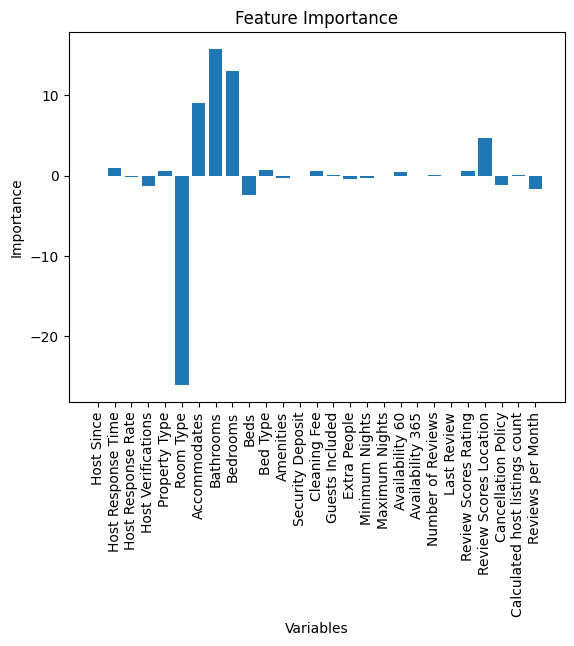

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Definimos nuestro conjunto de datos X e y
X = df.drop('Price', axis=1)
y = df['Price']

# Creamos nuestro modelo de Regresión Lineal y lo ajustamos
model = LinearRegression()
model.fit(X, y)

# Obtenemos la importancia de las variables
importance = model.coef_

column_names = X.columns

for i, v in enumerate(importance):
    print(f"{column_names[i]}: Score: {v:.5f}")

plt.bar(column_names, importance)
plt.xticks(rotation=90)  
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()






De este gráfico deducimos que:

Las barras con una altura positiva: Son las más importantes en el modelo. Indican que a medida que el valor de esa variable aumenta, el precio lo hace proporcionalmente.

Las barras con una altura cercana a cero 0: Representan variables con una influencia mínima en la predicción del precio. Estas variables serán las que no tendremos en cuenta cuando implementemos modelos con variables relevantes unicamente.

Las barras con una altura negativa: Representan una relación inversa entre esa variable y el precio. Esto significa que a medida que el valor de estas variables aumenta, el precio tiende a disminuir, y viceversa.

Siguiendo las indicaciones mencionadas recientemente, vemos que las variables "Acommodates", "Bathrooms", "Bedrooms" y "Review Scores Location" son las más influyentes, ya que su altura es bastante más alta que la del resto (La última variable va a tener algo menos de influencia que las otras tres).

La única variable que podríamos considerar que influye de forma inversa de manera relevante es "Room Type".

El resto de variables tienen una influencia escasa e incluso nula y por ello, serán ignoradas cuando construyamos modelos con variables relevantes.

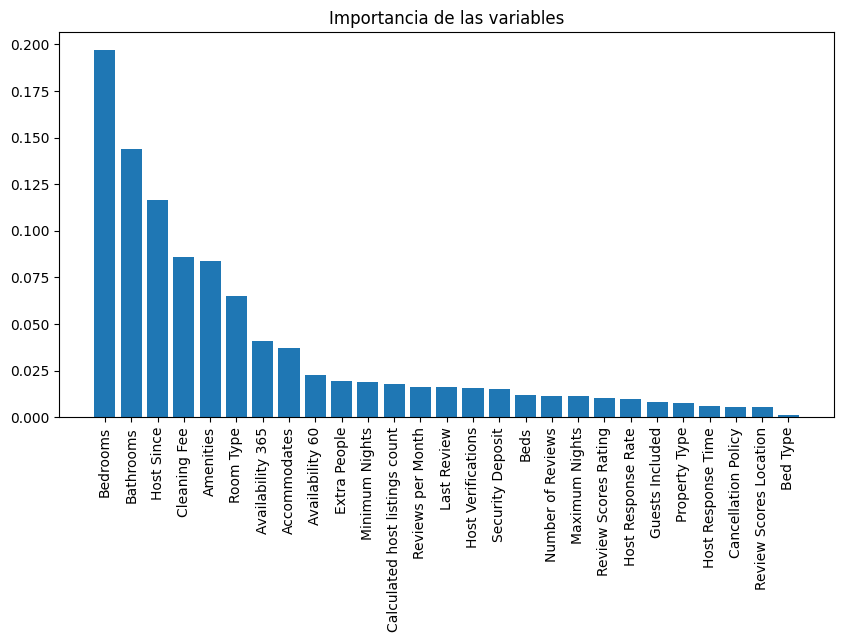

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Definimos nuestro conjunto de datos X e y
X = df.drop('Price', axis=1) 
y = df['Price']

# Creamos nuestro modelo Random Forest
model = RandomForestRegressor()

# Ajustamos el modelo a los datos
model.fit(X, y)

# Obtenemos la importancia de las variables
importance = model.feature_importances_

# Ordenamos las variables por su importancia
indices = importance.argsort()[::-1]

# Graficamos la importancia de las variables en orden descendente
plt.figure(figsize=(10, 5))
plt.title("Importancia de las variables")
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


Si utilizamos el random forest como ensamblador, observamos que las variables "Bedrooms", "Bathrooms" y "Room type" siguen siendo importantes, sin embargo aquí aparecen variables influyentes como "Amenities", "Host Since" o "Cleaning fee" que antes no aparecían.

## MODELOS:

### PARTICIÓN DEL CONJUNTO DE DATOS EN ENTRENAMIENTO Y TEST, Y ESCALADO DE LOS DATOS

En todos los modelos utilizaremos una partición de los datos de entrenamiento y test en una proporción del 75% y 25% respectivamente.
Con los datos de entrenamiento entrenaremos el modelo y con los de test lo evaluaremos.

In [ ]:
X = df.drop('Price', axis=1) 
y = df['Price']

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

# En el caso de necesitar escalado utilizaremos los datos esacaldos de la siguiente forma:
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Datos entrenamiento:  (10995, 27)
Datos test:  (3666, 27)


### 1. REGRESIÓN LINEAL:

El algoritmo de regresión lineal es el primero que vamos a utilizar. 
Realizaremos primero una regresión lineal simple con un única variable (tiene sentido escoger una significativa en el análisis de importancia de los modelos, ahora veremos cual). Posteriormente, realizaremos una regresión lineal múltiple con todas las variables.

No vamos a utilizar el modelo de regresión logística ya que la variable price no es binaria.

##### 1.1 REGRESIÓN LINEAL SIMPLE

Vamos a hacer uso de la variable 'bathrooms', junto con la de 'bedrooms' era la más importante

Antes de cada modelo, como mencionamos arriba, es conveniente considerar si el escalado de los datos es interesante. En este caso, al ser una regresión lineal simple y trabajar con una única variable predictora, no tenemos que preocuparnos por las diferencias de escala entre las variables.

In [ ]:
from sklearn import linear_model
from sklearn import metrics

# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train['Bathrooms'].values.reshape(-1, 1), y_train)

# Hacemos las predicciones
y_pred = regr.predict(X_test['Bathrooms'].values.reshape(-1, 1))

# Métricas
r2_score = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

# Imprimimos las métricas
print('R2 Score:', r2_score)
print('MAE:', mae)
print('RMSE:', rmse)


R2 Score: 0.14375007219370795
MAE: 38.03110462145682
RMSE: 63.876715952579815


En cualquiera de los modelos, las métricas obtenidas tendrán el siguiente significado, a partir del cual sacaremos conclusiones y compararemos el funcionamiento de los distintos algoritmos:

-Cuanto más alto sea el valor de R2, más ajustado será el modelo a los datos. 

-valores más bajos de MAE y RMSE indican que el modelo tiene un menor error en las predicciones.

En el caso de la regresión lineal simple, veremos, comparando con los otros modelos, que no da buenos resultados en la predicción de los valores de la variable objetivo. Es lógico ya que sólo se ha tenido en cuenta una variable entre las 27 del estudio.
Procederemos a examinar otros modelos.

#### 1.2 REGRESIÓN LINEAL MÚLTIPLE

Para el modelo de regresión lineal múltiple conviene trabajar con los datos escalados.

In [ ]:
from sklearn.linear_model import LinearRegression

# Creación del modelo de regresión lineal múltiple
model = LinearRegression()

# Entrenamiento del modelo con los datos escalados
model.fit(XtrainScaled, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(XtestScaled)

# Cálculo de las métricas
r2_score = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

# Imprimimos las métricas
print('R2 Score:', r2_score)
print('MAE:', mae)
print('RMSE:', rmse)


R2 Score: 0.44912359861930495
MAE: 27.716921085399772
RMSE: 51.23531258807798


Como era de esperar, las 3 métricas mejoran con respecto al modelo de regresión lineal simple.

#### 1.2.1 REGRESIÓN LINEAL MÚLTILE UNICAMENTE CON LAS VARIABLES RELEVANTES

"Accommodates", "Bathrooms", "Bedrooms" ,"Review Scores Location" , "Room Type" ,"Amenities", "Host Since" y "Cleaning fee" son las más importantes y las elegidas para llevar a cabo este algoritmo.

Al igual que antes, también consideraremos los datos escalados.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()

X_train1 = X_train.loc[:, ['Accommodates', 'Bathrooms', 'Bedrooms', 'Review Scores Location', 'Room Type', 'Amenities', 'Host Since', 'Cleaning Fee']]
X_test1 = X_test.loc[:, ['Accommodates', 'Bathrooms', 'Bedrooms', 'Review Scores Location', 'Room Type', 'Amenities', 'Host Since', 'Cleaning Fee']]

model.fit(X_train1, y_train)
y_pred = model.predict(X_test1)

# Cálculo de las métricas
r2_score = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

# Imprimimos las métricas
print('R2 Score:', r2_score)
print('MAE:', mae)
print('RMSE:', rmse)


R2 Score: 0.42106842128588395
MAE: 27.46513452961224
RMSE: 52.523774216575745


Los resultados obtenidos en este modelo son similares a los obtenidos en el de regresión lineal múltiple con todas las variables, aunque algo peores. El MAE no cambia, pero el R2 baja 0.05 y el RMSE aumenta 3 unidades. Sin embargo, no apreciamos grandes diferencias. Esto nos indicará que el subconjunto de variables elegido predice de forma muy similar al conjunto total.
A pesar de que el coste computacional sea algo mayor considerando todas las variables, los resultados son mejores y por ello, de los tres modelos probados hasta ahora nos quedaríamos con la regresión lineal múltiple

### 2. REGRESIÓN RIDGE

La regresión Ridge es un método de regresión lineal que ajusta los datos de entrenamiento y a su vez, trabaja por mantener los coeficientes pequeños, de esta manera evitaremos el sobreajuste.

En la regresión ridge haremos escalado de los datos y además, utilizaremos la técnica de gridsearch para que evalúe el modelo con distintos valores del hiperparámetro alpha y poder obtener la mejor precisión dentro de nuestras posibilidades. El código sería el siguiente:

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Creamos un objeto de regresión Ridge
ridge_regression = Ridge()

# Definimos los valores de `alpha` a probar
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Realizamos el GridSearch con validación cruzada
grid_search = GridSearchCV(ridge_regression, param_grid, cv=5)
grid_search.fit(XtrainScaled, y_train)

# Obtenemos el mejor modelo y el mejor valor de `alpha`
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Realizamos predicciones en los datos de prueba escalados
y_pred = best_model.predict(XtestScaled)

# Calculamos el MAE utilizando el mejor modelo
mae = mean_absolute_error(y_test, y_pred)

# Calculamos el coeficiente de determinación (R2) utilizando el mejor modelo
r2 = r2_score(y_test, y_pred)

# Calculamos el RMSE utilizando el mejor modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimimos el mejor valor de `alpha`, MAE, R2 y RMSE
print("Mejor valor de alpha:", best_alpha)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


Mejor valor de alpha: 10.0
R2: 0.44919816648474564
MAE: 27.706387788659573
RMSE: 51.231844807299765


Obtenemos resultados muy parecidos a la regresión lineal múltiple

### 3. KNN

El algoritmo KNN, a la hora de realizar una predicción para una nueva observación, busca los "k" vecinos(observaciones) más cercanas a la observación en cuestión en función de alguna medida de distancia. Utiliza la información de estos vecinos cercanos para predecir el valor del nuevo punto

En el algoritmo KNN es conveniente hacer un escalado de los datos antes de aplicar el algoritmo.
Por otro lado, en este algoritmo aplicaremos la técnica de gridsearch de nuevo, con distintos valores de k, para encontrar el valor del hiperparámetro k (número de vecinos cercanos) que mejores predicciones realiza.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Creamos un objeto de regresión KNN
knn_regression = KNeighborsRegressor()

# Definimos los valores de 'k' a probar
param_grid = {'n_neighbors': ([1, 3, 5, 7, 9, 11, 13])}

# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(knn_regression, param_grid, cv=5)
grid_search.fit(XtrainScaled, y_train)

# Obtenemos el mejor modelo y el mejor valor de 'k'
best_model = grid_search.best_estimator_
best_k = grid_search.best_params_['n_neighbors']

# Realizamos predicciones en los datos de prueba escalados
y_pred = best_model.predict(XtestScaled)

# Calculamos el MAE utilizando el mejor modelo
mae = mean_absolute_error(y_test, y_pred)

# Calculamos el coeficiente de determinación (R2) utilizando el mejor modelo
r2 = r2_score(y_test, y_pred)

# Calculamos el RMSE utilizando el mejor modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimimos el mejor valor de 'k', MAE, R2 y RMSE
print("Mejor valor de k:", best_k)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


Mejor valor de k: 5
R2: 0.5791450746399704
MAE: 22.342171303873428
RMSE: 44.78251841136889


Hasta el momento, el algoritmo KNN es el que nos da el R2 más alto y además, bastante bueno (0.5791).
Por otro lado, el MAE y el RMSE son los más bajos obtenidos hasta el momento. Estos resultados nos indican que el algoritmo KNN realiza las mejores predicciones de entre todos los que llevamos estudiados.


### 4. ÁRBOLES DE DECISIÓN SIMPLE

Este algoritmo no requiere escalado de datos porque no se basa en distancias. La partición de los datos es la siguiente:


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Definimos el modelo de árbol de decisión
tree_model = DecisionTreeRegressor()

# Definimos los parámetros que deseas buscar en la cuadrícula
parameters = {'max_depth': [2, 4, 6, 8, 10]}

# Realizamos la búsqueda en cuadrícula
grid_search = GridSearchCV(tree_model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo y los mejores parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Realizamos la predicción en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calculamos el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Calculamos el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculamos la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimimos las métricas
print("Coeficiente de determinación (R2):", r2)
print("Error absoluto medio (MAE):", mae)
print("Raíz del error cuadrático medio (RMSE):", rmse)


Coeficiente de determinación (R2): 0.48004287522775946
Error absoluto medio (MAE): 25.89503625070636
Raíz del error cuadrático medio (RMSE): 49.77669674504395


Los resultados obtenidos son bastante malos, sobre todo el R2, el MAE se mantiene mas o menos igual que en muchos otros modelos y el resultado del RMSE es de los peores de todos los modelos hechos.

Con el GridSearch obtenemos que la mejor profundidad de árbol es 6

### 5.XGBOOST

El algoritmo de XGBoost se enfoca en minimizar una función de pérdida utilizando el método del descenso del gradiente. 
No requiere escalado de datos.

Los hiperparámetros los buscaremos de nuevo con GridSearch.


In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Creamos el objeto DMatrix para los conjuntos de entrenamiento y prueba
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definimos los parámetros a buscar en la cuadrícula
param_grid = {
    'max_depth': [3, 4, 5],  # Profundidad máxima del árbol
    'learning_rate': [0.1, 0.01, 0.001],  # Tasa de aprendizaje
    'subsample': [0.8, 0.9],  # Submuestreo de muestras para construir árboles
    'colsample_bytree': [0.8, 0.9]  # Submuestreo de características para construir árboles
}

# Definimos el modelo XGBoost
xgb_model = xgb.XGBRegressor()

# Realizamos la búsqueda en cuadrícula
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo y los mejores parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Obtenemos la mejor profundidad del árbol
best_depth = best_params['max_depth']
print("Mejor profundidad del árbol:", best_depth)

# Realizamos la predicción en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calculamos el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Calculamos el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculamos la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimimos las métricas
print("Coeficiente de determinación (R2):", r2)
print("Error absoluto medio (MAE):", mae)
print("Raíz del error cuadrático medio (RMSE):", rmse)


Mejor profundidad del árbol: 5
Coeficiente de determinación (R2): 0.6673992905580977
Error absoluto medio (MAE): 20.25477330696368
Raíz del error cuadrático medio (RMSE): 39.811073795088994


De todos los algoritmos construidos hasta el momento, con el XGboost obtenemos los mejores valores para las 3 métricas MAE y RMSE y R2.
Estamos satisfechos con los resultados obtenidos en este algoritmo.

### 6.REDES NEURONALES

### 6.1 RED NEURONAL CON 1 CAPA

Primero vamos a construir una red neuronal sin capas ocultas.
Es recomendable escalar los datos. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Definimos la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(X_train.shape[1],))  # Capa de salida con una neurona
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos la red neuronal
model.fit(XtrainScaled, y_train, epochs=50, batch_size=32, verbose=0)

# Realizamos la predicción en el conjunto de prueba
y_pred = model.predict(XtestScaled).flatten()

# Calculamos el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Calculamos el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculamos la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimimos las métricas
print("Coeficiente de determinación (R2):", r2)
print("Error absoluto medio (MAE):", mae)
print("Raíz del error cuadrático medio (RMSE):", rmse)


115/115 [==============================] - 0s 2ms/step
Coeficiente de determinación (R2): -0.24721903383841815
Error absoluto medio (MAE): 57.547012588981715
Raíz del error cuadrático medio (RMSE): 77.09277365021795


### 6.2 RED NEURONAL MULTICAPA

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import set_config
import multiprocessing

# Definimos el espacio de búsqueda de cada hiperparámetro
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Pipeline que definirá el modelo
pipe = Pipeline([('modelo', MLPRegressor(solver = 'adam', max_iter= 100))])

# Búsqueda por validación cruzada
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = XtrainScaled, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

neural_final = grid.best_estimator_
neural_final['modelo'].get_params()

# Realizamos la predicción en el conjunto de prueba
y_pred = neural_final.predict(X = XtestScaled)

# Calculamos el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Calculamos el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculamos la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimimos las métricas
print("Coeficiente de determinación (R2):", r2)
print("Error absoluto medio (MAE):", mae)
print("Raíz del error cuadrático medio (RMSE):", rmse)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Coeficiente de determinación (R2): 0.5755130253675336
Error absoluto medio (MAE): 22.63809638321016
Raíz del error cuadrático medio (RMSE): 44.97534363516029


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## COMPARACIÓN DE LOS MODELOS

Para concluir esta parte crearemos una tabla en la que aparezcan los resultados obtenidos en cada modelo. De esta forma, nos resultará más fácil ver el desempeño de los distintos algoritmos

In [1]:
import pandas as pd

tabla = {
    'Modelo': ['Regresión Lineal Simple', 'Regresión Lineal Múltiple', 'Regresión Lineal Múltiple con Variables Relevantes',
               'Regresión Ridge', 'KNN', 'Árboles de Decisión Simple', 'XGBoost', 'Red de una Capa', 'Red Multicapa'],
    'R2 Score': [0.14375007219370795, 0.44912359861930495, 0.42106842128588395, 0.44919816648474564,
                 0.5791450746399704, 0.48004287522775946, 0.6673992905580977, 0.24721903383841815, 0.5755130253675336],
    'MAE': [38.03110462145682, 27.716921085399772, 27.46513452961224, 27.706387788659573, 22.342171303873428,
            25.89503625070636, 20.25477330696368, 57.547012588981715, 22.63809638321016],
    'RMSE': [63.876715952579815, 51.23531258807798, 52.523774216575745, 51.231844807299765, 44.78251841136889,
             49.77669674504395, 39.811073795088994, 77.09277365021795, 44.97534363516029]
}

# Crear el DataFrame utilizando el diccionario
comparacion = pd.DataFrame(tabla)

# Establecer el índice de las filas como el tipo de modelo
comparacion.set_index('Modelo', inplace=True)


# Mostrar la tabla formateada con el DataFrame ordenado
print(comparacion.to_string(float_format="%.6f"))


                                                    R2 Score       MAE      RMSE
Modelo                                                                          
Regresión Lineal Simple                             0.143750 38.031105 63.876716
Regresión Lineal Múltiple                           0.449124 27.716921 51.235313
Regresión Lineal Múltiple con Variables Relevantes  0.421068 27.465135 52.523774
Regresión Ridge                                     0.449198 27.706388 51.231845
KNN                                                 0.579145 22.342171 44.782518
Árboles de Decisión Simple                          0.480043 25.895036 49.776697
XGBoost                                             0.667399 20.254773 39.811074
Red de una Capa                                     0.247219 57.547013 77.092774
Red Multicapa                                       0.575513 22.638096 44.975344


En la tabla anterior se muestran los resultados de cada algoritmo. En este siguiente paso nos interesa ordenarlos de mejor a peor según cada métrica.

Empezaremos ordenandolos por la de R2

### SEGÚN $R^2$

In [2]:
# Ordenamos la columna "R2" de mayor a menor
comparacion = pd.DataFrame(tabla)
comparacion_ordenada = comparacion.sort_values('R2 Score', ascending=False)

# Establecer el índice de las filas como el tipo de modelo
comparacion_ordenada.set_index('Modelo', inplace=True)

# Mostrar la tabla formateada con el DataFrame ordenado
print(comparacion_ordenada.to_string(float_format="%.6f"))


                                                    R2 Score       MAE      RMSE
Modelo                                                                          
XGBoost                                             0.667399 20.254773 39.811074
KNN                                                 0.579145 22.342171 44.782518
Red Multicapa                                       0.575513 22.638096 44.975344
Árboles de Decisión Simple                          0.480043 25.895036 49.776697
Regresión Ridge                                     0.449198 27.706388 51.231845
Regresión Lineal Múltiple                           0.449124 27.716921 51.235313
Regresión Lineal Múltiple con Variables Relevantes  0.421068 27.465135 52.523774
Red de una Capa                                     0.247219 57.547013 77.092774
Regresión Lineal Simple                             0.143750 38.031105 63.876716


## SEGÚN MAE

In [3]:
# Ordenar la columna "MAE" de mayor a menor
comparacion = pd.DataFrame(tabla)
comparacion_ordenada = comparacion.sort_values('MAE')

# Establecer el índice de las filas como el tipo de modelo
comparacion_ordenada.set_index('Modelo', inplace=True)

# Mostrar la tabla formateada con el DataFrame ordenado
print(comparacion_ordenada.to_string(float_format="%.6f"))

                                                    R2 Score       MAE      RMSE
Modelo                                                                          
XGBoost                                             0.667399 20.254773 39.811074
KNN                                                 0.579145 22.342171 44.782518
Red Multicapa                                       0.575513 22.638096 44.975344
Árboles de Decisión Simple                          0.480043 25.895036 49.776697
Regresión Lineal Múltiple con Variables Relevantes  0.421068 27.465135 52.523774
Regresión Ridge                                     0.449198 27.706388 51.231845
Regresión Lineal Múltiple                           0.449124 27.716921 51.235313
Regresión Lineal Simple                             0.143750 38.031105 63.876716
Red de una Capa                                     0.247219 57.547013 77.092774


## SEGÚN RMSE

In [4]:
# Ordenar la columna "RMSE" de mayor a menor
comparacion = pd.DataFrame(tabla)
comparacion_ordenada = comparacion.sort_values('RMSE')

# Establecer el índice de las filas como el tipo de modelo
comparacion_ordenada.set_index('Modelo', inplace=True)

# Mostrar la tabla formateada con el DataFrame ordenado
print(comparacion_ordenada.to_string(float_format="%.6f"))


                                                    R2 Score       MAE      RMSE
Modelo                                                                          
XGBoost                                             0.667399 20.254773 39.811074
KNN                                                 0.579145 22.342171 44.782518
Red Multicapa                                       0.575513 22.638096 44.975344
Árboles de Decisión Simple                          0.480043 25.895036 49.776697
Regresión Ridge                                     0.449198 27.706388 51.231845
Regresión Lineal Múltiple                           0.449124 27.716921 51.235313
Regresión Lineal Múltiple con Variables Relevantes  0.421068 27.465135 52.523774
Regresión Lineal Simple                             0.143750 38.031105 63.876716
Red de una Capa                                     0.247219 57.547013 77.092774


### CONCLUSIONES FINALES

Las tres métricas nos indican que los mejores modelos son , Xgboost, KNN, y la Red Neuronal Multicapa, en ese orden. Por tanto, si queremos hacer predicciones, utilizaremos uno de ellos, preferiblemente XGBoost, aunque ocasionalmente KNN por su fácil explicación a alguien no experto. También observamos en todas ellas que uno de los peores modelos es la Regresión lineal simple (era de esperar puesto que sólo se utiliza una variable), y la Red Neuronal de 1 capa.